

---



# <h1 align=center> **Carolina del Valle Garay** </h1>




---


#<font color='blue'>**Análisis Exploratorio de Datos (EDA)**

El Análisis Exploratorio de Datos (EDA) es una etapa crucial en cualquier proyecto de Ciencia de Catos y Machine Learning. Con los datos limpios, es posible investigar las relaciones entre las variables de los datasets. Este análisis incluye la identificación de outliers o anomalías, que no necesariamente son errores, y la búsqueda de patrones interesantes que puedan ser útiles en análisis posteriores.

En este proyecto, el EDA permitirá investigar el conjunto de datos provenientes del Ente Nacional de Telecomunicaciones (**ENACOM**) con la finalidad de reconocer el comportamiento de este sector a nivel nacional y así aconsejar a la empresa que ha contratado mis servicios.

**El análisis exhaustivo de los datos posibilitará orientar a la empresa en brindar una buena calidad de sus servicios, identificar oportunidades de crecimiento y poder plantear soluciones personalizadas a sus posibles clientes.**



---






In [98]:
#Se importan las librerías necesarias
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

In [99]:
# Suprimir las advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)

##Ingesta de datos

Se dispone de los siguientes datasets que fueron descargados del sitio [https://indicadores.enacom.gob.ar/datos-abiertos](https://indicadores.enacom.gob.ar/datos-abiertos):


* 1) Internet
* 2) Mapa Conectividad


Los datasets se encuentran alojados en mi Drive personal y son de acceso público.


In [100]:
#Descarga de los datasets
#1Internet
!gdown https://docs.google.com/spreadsheets/d/1phSprAC3W6OA2qtAw8GDsZ7FAGWiiQco/edit?usp=sharing --fuzzy

#2Mapa Conectividad
!gdown https://docs.google.com/spreadsheets/d/16_YxCrNreJGb7W1uMi3hs61lpU59sL5v/edit?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1phSprAC3W6OA2qtAw8GDsZ7FAGWiiQco
To: /content/Internet.xlsx
100% 990k/990k [00:00<00:00, 94.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=16_YxCrNreJGb7W1uMi3hs61lpU59sL5v
To: /content/mapa_conectividad.xlsx
100% 497k/497k [00:00<00:00, 7.71MB/s]


#<font color='green'>**Análisis y decisón sobre datos faltantes**

Se crea una función para evaluar los datos faltantes del dataset Internet, el mismo cuenta con 15 hojas.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def calcular_porcentaje_nulos(ruta_archivo):
    # Cargar el archivo Excel
    xls = pd.ExcelFile(ruta_archivo)

    # Crear un diccionario para almacenar los resultados
    porcentaje_nulos = {}

    # Iterar sobre cada hoja en el archivo
    for hoja in xls.sheet_names:
        # Leer la hoja actual
        df = pd.read_excel(xls, hoja)

        # Calcular el porcentaje de valores nulos
        porcentaje_nulo = df.isnull().mean().mean() * 100

        # Almacenar el resultado en el diccionario
        porcentaje_nulos[hoja] = porcentaje_nulo

    return porcentaje_nulos

def mostrar_tabla_colores(porcentaje_nulos):
    # Convertir el diccionario en un DataFrame
    df_nulos = pd.DataFrame(list(porcentaje_nulos.items()), columns=['Hoja', 'Porcentaje Nulos'])

    # Definir la función para aplicar estilos
    def resaltar_porcentaje(val):
        color = 'lightgreen' if val == 0 else ''
        return f'background-color: {color}'

    # Aplicar estilos a la tabla
    styled_table = df_nulos.style.applymap(resaltar_porcentaje, subset=['Porcentaje Nulos'])

    # Mostrar la tabla estilizada
    display(styled_table)

# Uso de las funciones
ruta_archivo = 'Internet.xlsx'
resultado = calcular_porcentaje_nulos(ruta_archivo)
mostrar_tabla_colores(resultado)


###**Decisión sobre valores faltantes:**

Dado que el porcentaje de valores nulos en la hoja 'Acc_vel_loc_sinrangos' es casi el 100% se decide no trabajar con estos datos.

Para las demás hojas se trabajará primero con aquellas que no tienen faltantes de datos y luego se decidirá qué hacer con el resto.



##Hoja Nro 3: 'Velocidad % por prov'

Distribución porcentual de la velocidad de conexión a internet por provincia.




In [6]:
def cargar_hoja_excel(ruta_archivo, nombre_hoja):
    # Cargar la hoja específica en un DataFrame
    df = pd.read_excel(ruta_archivo, sheet_name=nombre_hoja)

    return df

In [7]:
# Uso de la función
ruta_archivo = 'Internet.xlsx'
nombre_hoja = 'Velocidad % por prov'

# Cargar la hoja en un DataFrame
df3 = cargar_hoja_excel(ruta_archivo, nombre_hoja)


In [8]:
df3.shape

(984, 4)

In [9]:
# Mostrar las primeras filas del Dataframe
df3.head()

Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          1     Buenos Aires                  159.13
1  2024          1  Capital Federal                  229.94
2  2024          1        Catamarca                   91.45
3  2024          1            Chaco                  107.51
4  2024          1           Chubut                   20.50

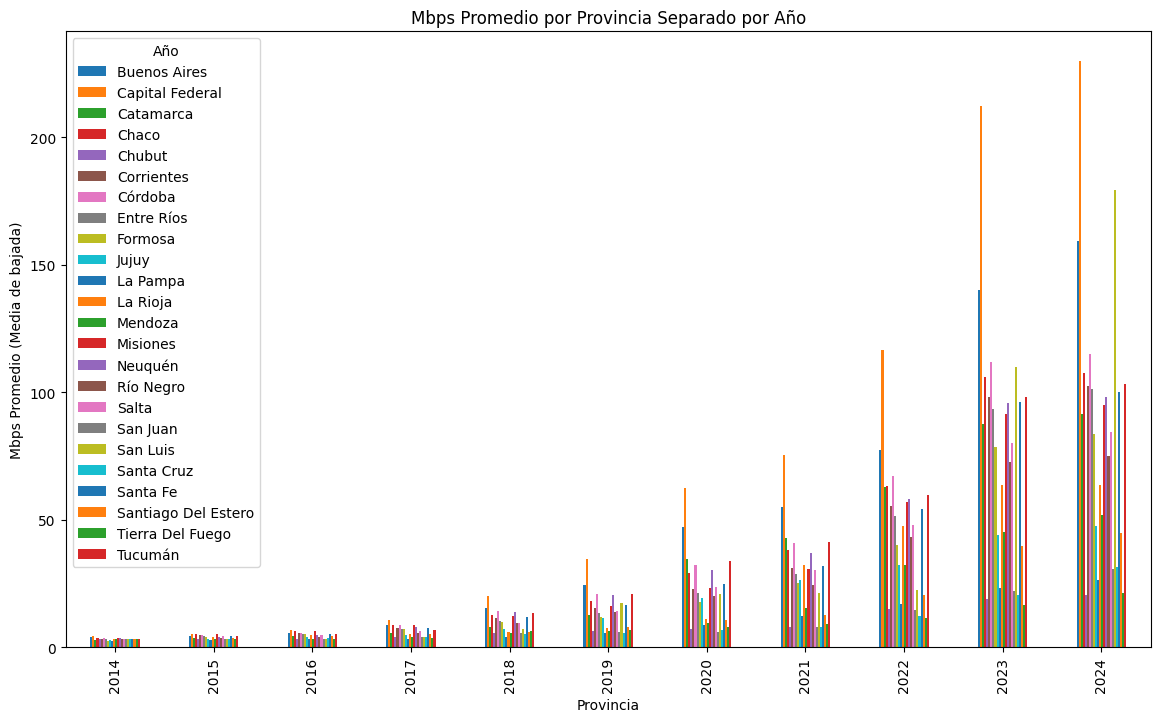

In [10]:
# Calcular el Mbps promedio por provincia y año
promedio_por_provincia_ano = df3.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack()

# Opcional: Crear un gráfico de barras apiladas para visualizar el promedio por provincia y año
promedio_por_provincia_ano.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Mbps Promedio por Provincia Separado por Año')
plt.xlabel('Provincia')
plt.ylabel('Mbps Promedio (Media de bajada)')
plt.legend(title='Año')
plt.show()

In [11]:
promedio_por_provincia_ano

Provincia  Buenos Aires  Capital Federal  Catamarca       Chaco     Chubut  \
Año                                                                          
2014           3.938247         4.373310   2.992319    3.528954   3.168178   
2015           4.593012         5.476086   3.793736    5.347374   3.248158   
2016           5.668444         6.990348   4.544844    6.521145   3.366674   
2017           8.818755        10.757327   5.780035    8.796215   3.944310   
2018          15.648091        20.315596   7.935600   12.832643   5.727610   
2019          24.643270        34.494651  12.736430   18.206025   6.476644   
2020          47.307067        62.580959  34.562176   29.287277   7.376924   
2021          55.001940        75.424761  42.991246   38.119721   8.116989   
2022          77.300000       116.525000  63.025000   63.420000  14.950000   
2023         139.965000       212.307500  87.710000  106.105000  19.122500   
2024         159.130000       229.940000  91.450000  107.510000  20.500000   

Provincia  Corrientes     Córdoba  Entre Ríos    Formosa      Jujuy  ...  \
Año                                                                  ...   
2014         3.450659    3.674289    3.419838   2.726423   2.879411  ...   
2015         4.949586    4.699287    4.667971   3.993135   3.476996  ...   
2016         5.791885    5.802245    5.402374   5.255818   4.038457  ...   
2017         7.764092    8.743239    7.132161   7.276009   5.065888  ...   
2018        11.407077   14.324824   10.402495   9.791798   7.315785  ...   
2019        15.459516   20.880516   13.638817  12.102717  11.390322  ...   
2020        22.996883   32.253540   21.491066  17.637198  19.281437  ...   
2021        31.073697   41.011903   28.602166  25.098427  26.428721  ...   
2022        55.302500   67.122500   51.395000  40.282500  32.207500  ...   
2023        98.137500  111.730000   93.380000  78.730000  44.265000  ...   
2024       102.490000  114.890000  101.360000  83.800000  47.520000  ...   

Provincia    Neuquén  Río Negro      Salta   San Juan    San Luis  Santa Cruz  \
Año                                                                             
2014        3.701922   3.451383   3.491302   3.472642    3.503414    3.318623   
2015        4.139162   3.689449   4.334050   3.479651    3.502364    3.477299   
2016        5.064378   4.084033   4.941249   3.488525    3.502683    3.521256   
2017        7.904944   5.680900   6.419118   4.066628    4.060311    4.003025   
2018       13.972737   9.759326   9.460211   5.787413    7.357230    5.216951   
2019       20.723954  13.819297  14.188972   6.009047   17.254677    5.503428   
2020       30.559300  20.363599  23.641795   6.196583   21.028222    6.787961   
2021       37.195744  24.568897  30.427129   7.999326   21.466175    7.953544   
2022       58.190000  43.447500  48.185000  14.665000   22.567500   12.407500   
2023       95.897500  72.615000  79.947500  22.080000  109.812500   20.725000   
2024       98.160000  75.000000  84.340000  30.580000  179.490000   31.600000   

Provincia    Santa Fe  Santiago Del Estero  Tierra Del Fuego     Tucumán  
Año                                                                       
2014         3.403850             3.144248          3.465673    3.442199  
2015         4.434062             3.826314          3.470985    4.458127  
2016         5.438558             4.505186          3.476770    5.369367  
2017         7.803124             5.337768          3.908027    6.864996  
2018        12.114688             6.062078          6.283818   13.675341  
2019        16.693560             8.174950          6.660451   21.074250  
2020        24.833786            10.642985          8.133170   34.057028  
2021        31.997208            12.874146          9.385845   41.384712  
2022        54.087500            20.732500         11.547500   59.755000  
2023        96.072500            39.892500         16.647500   98.220000  
2024       100.200000            44.900000

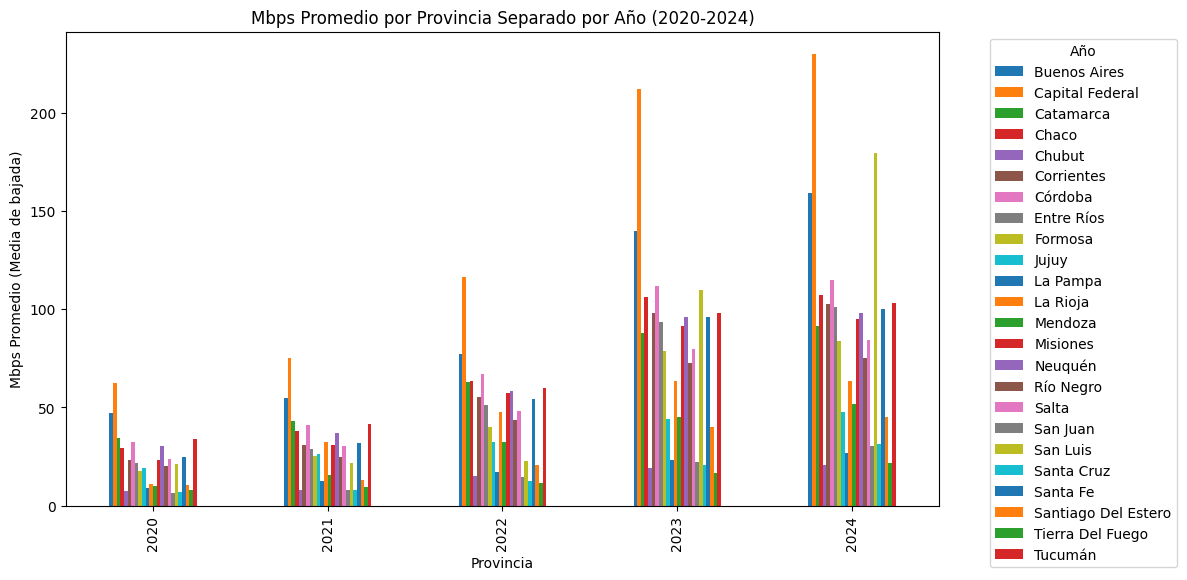

In [12]:
# Filtrar los datos para los años específicos
años_filtrados = [2020, 2021, 2022, 2023, 2024]
df_filtrado = df3[df3['Año'].isin(años_filtrados)]

# Calcular el Mbps promedio por provincia y año
promedio_por_provincia_ano = df_filtrado.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack()


# Crear el gráfico de barras para los años filtrados
promedio_por_provincia_ano.plot(kind='bar', stacked=False, figsize=(12, 6))
# Configurar la leyenda fuera del gráfico, en la parte derecha
plt.title('Mbps Promedio por Provincia Separado por Año (2020-2024)')
plt.xlabel('Provincia')
plt.ylabel('Mbps Promedio (Media de bajada)')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar el layout para que se acomode todo correctamente
plt.tight_layout()
# Mostrar el gráfico
plt.show()

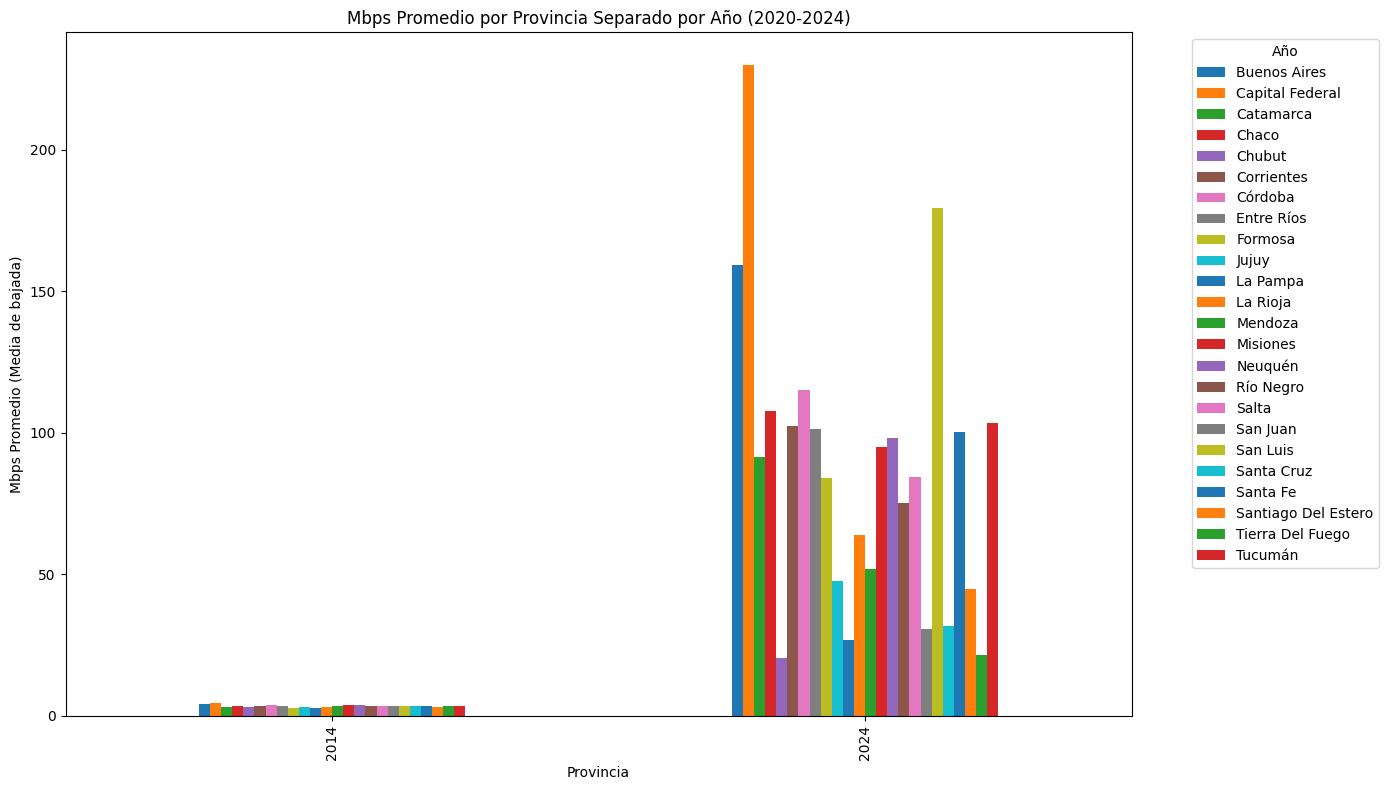

In [13]:
# Filtrar los datos para los años específicos
años_filtrados2 = [2014, 2024]
df_filtrado2 = df3[df3['Año'].isin(años_filtrados2)]

# Calcular el Mbps promedio por provincia y año
promedio_por_provincia_ano = df_filtrado2.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().unstack()


# Crear el gráfico de barras para los años filtrados
promedio_por_provincia_ano.plot(kind='bar', stacked=False, figsize=(14, 8))
# Configurar la leyenda fuera del gráfico, en la parte derecha
plt.title('Mbps Promedio por Provincia Separado por Año (2020-2024)')
plt.xlabel('Provincia')
plt.ylabel('Mbps Promedio (Media de bajada)')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ajustar el layout para que se acomode todo correctamente
plt.tight_layout()
# Mostrar el gráfico
plt.show()

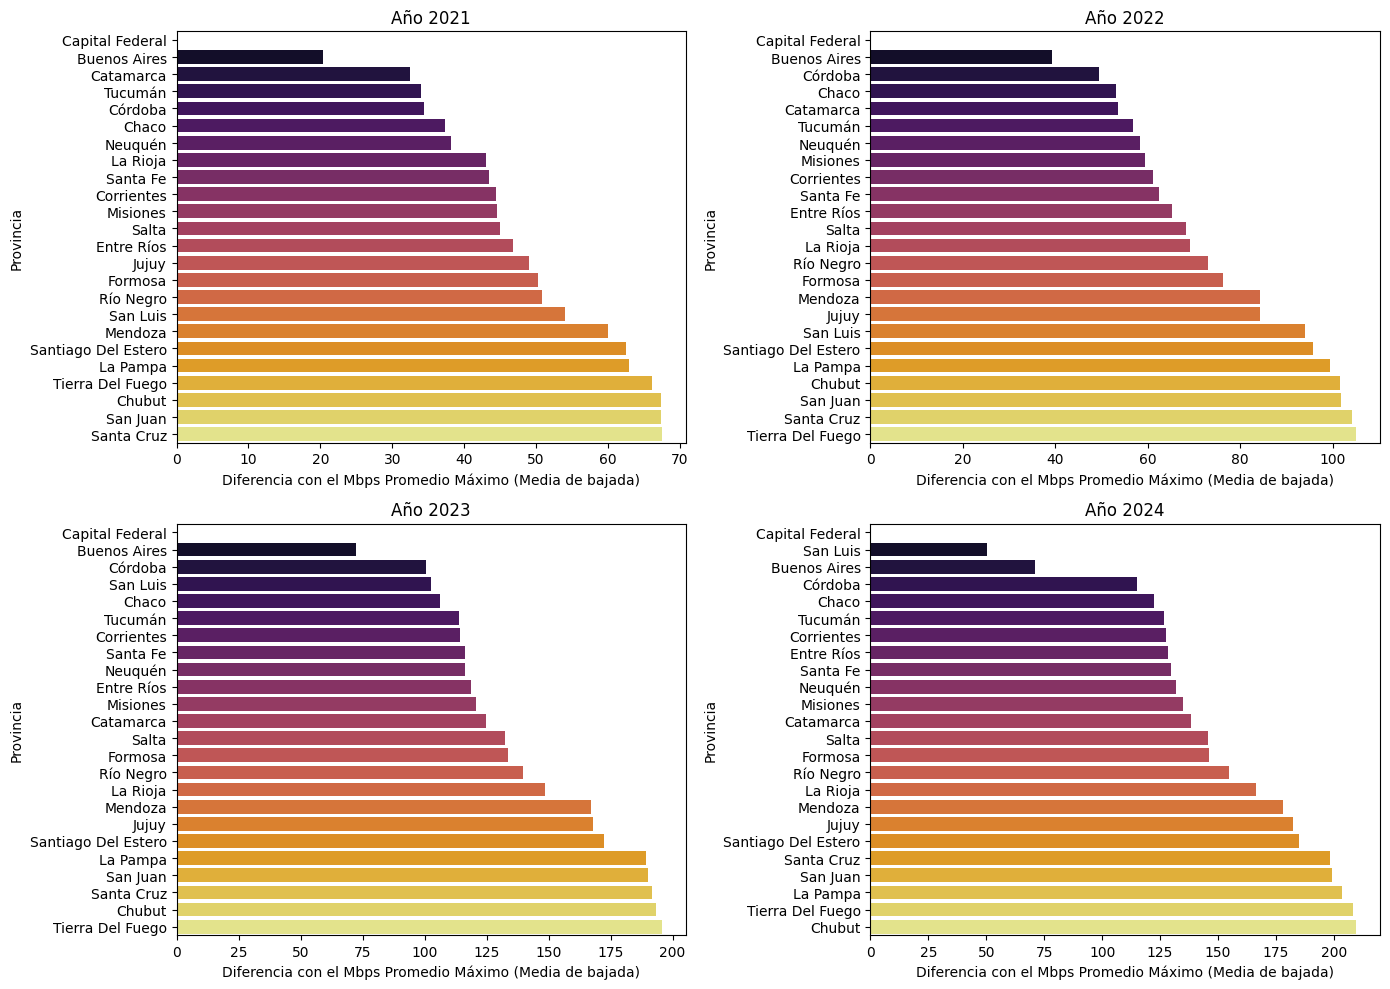

In [14]:
# Filtrar los datos para los años específicos
años_filtrados = [2021, 2022, 2023, 2024]
df_filtrado = df3[df3['Año'].isin(años_filtrados)]

# Crear figura y ejes para los gráficos distribuidos en 2 paneles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 panel

# Iterar sobre los años filtrados y crear gráficos por separado
for i, año in enumerate(años_filtrados):
    # Filtrar datos por año
    df_año = df_filtrado[df_filtrado['Año'] == año]

    # Calcular el Mbps promedio por provincia para el año específico
    promedio_por_provincia = df_año.groupby('Provincia')['Mbps (Media de bajada)'].mean()

    # Encontrar el Mbps promedio máximo
    max_mbps = promedio_por_provincia.max()

    # Calcular la diferencia de cada provincia respecto al máximo
    diferencia_max_mbps = max_mbps - promedio_por_provincia

    # Crear un DataFrame con las diferencias
    diferencia_max_mbps_df = diferencia_max_mbps.reset_index()
    diferencia_max_mbps_df.columns = ['Provincia', 'Diferencia con el Mbps Máximo']

    # Ordenar el DataFrame por la columna de diferencias de menor a mayor
    diferencia_max_mbps_df = diferencia_max_mbps_df.sort_values(by='Diferencia con el Mbps Máximo', ascending=True)

    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Crear el gráfico de barras ordenado para el año específico
    sns.barplot(x='Diferencia con el Mbps Máximo', y='Provincia', data=diferencia_max_mbps_df, palette='inferno', ax=ax)
    ax.set_title(f'Año {año}')
    ax.set_xlabel('Diferencia con el Mbps Promedio Máximo (Media de bajada)')
    ax.set_ylabel('Provincia')

# Ajustar los layouts para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

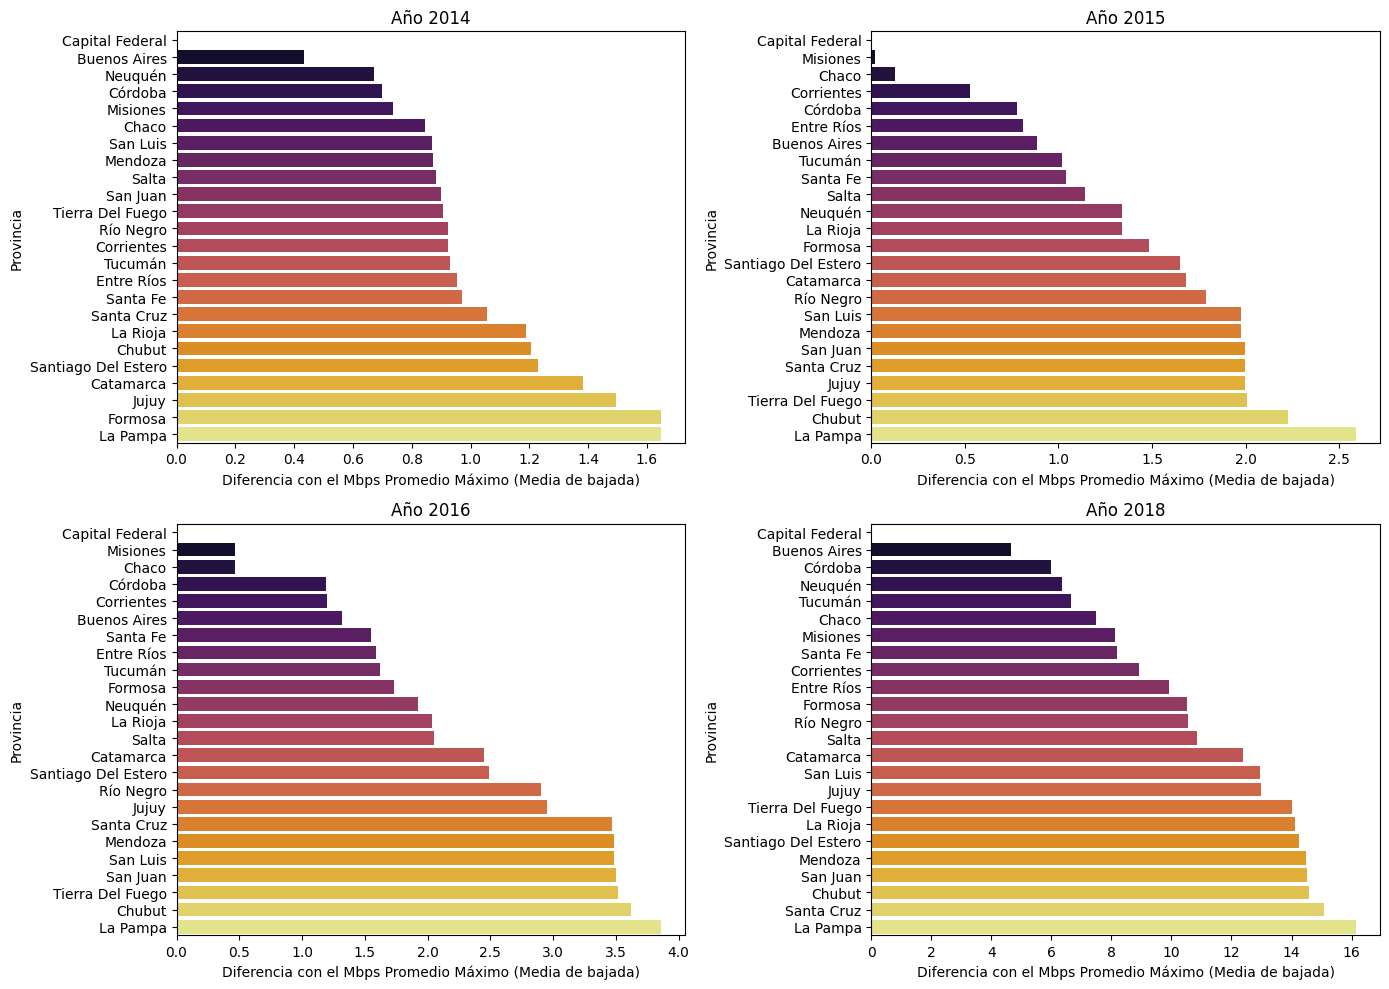

In [15]:
# Filtrar los datos para los años específicos
años_filtrados4 = [2014, 2015, 2016, 2018]
df_filtrado4 = df3[df3['Año'].isin(años_filtrados4)]

# Crear figura y ejes para los gráficos distribuidos en 2 paneles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 panel

# Iterar sobre los años filtrados y crear gráficos por separado
for i, año in enumerate(años_filtrados4):
    # Filtrar datos por año
    df_año4 = df_filtrado4[df_filtrado4['Año'] == año]

    # Calcular el Mbps promedio por provincia para el año específico
    promedio_por_provincia4 = df_año4.groupby('Provincia')['Mbps (Media de bajada)'].mean()

    # Encontrar el Mbps promedio máximo
    max_mbps4 = promedio_por_provincia4.max()

    # Calcular la diferencia de cada provincia respecto al máximo
    diferencia_max_mbps4 = max_mbps4 - promedio_por_provincia4

    # Crear un DataFrame con las diferencias
    diferencia_max_mbps4_df = diferencia_max_mbps4.reset_index()
    diferencia_max_mbps4_df.columns = ['Provincia', 'Diferencia con el Mbps Máximo']

    # Ordenar el DataFrame por la columna de diferencias de menor a mayor
    diferencia_max_mbps4_df = diferencia_max_mbps4_df.sort_values(by='Diferencia con el Mbps Máximo', ascending=True)

    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Crear el gráfico de barras ordenado para el año específico
    sns.barplot(x='Diferencia con el Mbps Máximo', y='Provincia', data=diferencia_max_mbps4_df, palette='inferno', ax=ax)
    ax.set_title(f'Año {año}')
    ax.set_xlabel('Diferencia con el Mbps Promedio Máximo (Media de bajada)')
    ax.set_ylabel('Provincia')

# Ajustar los layouts para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

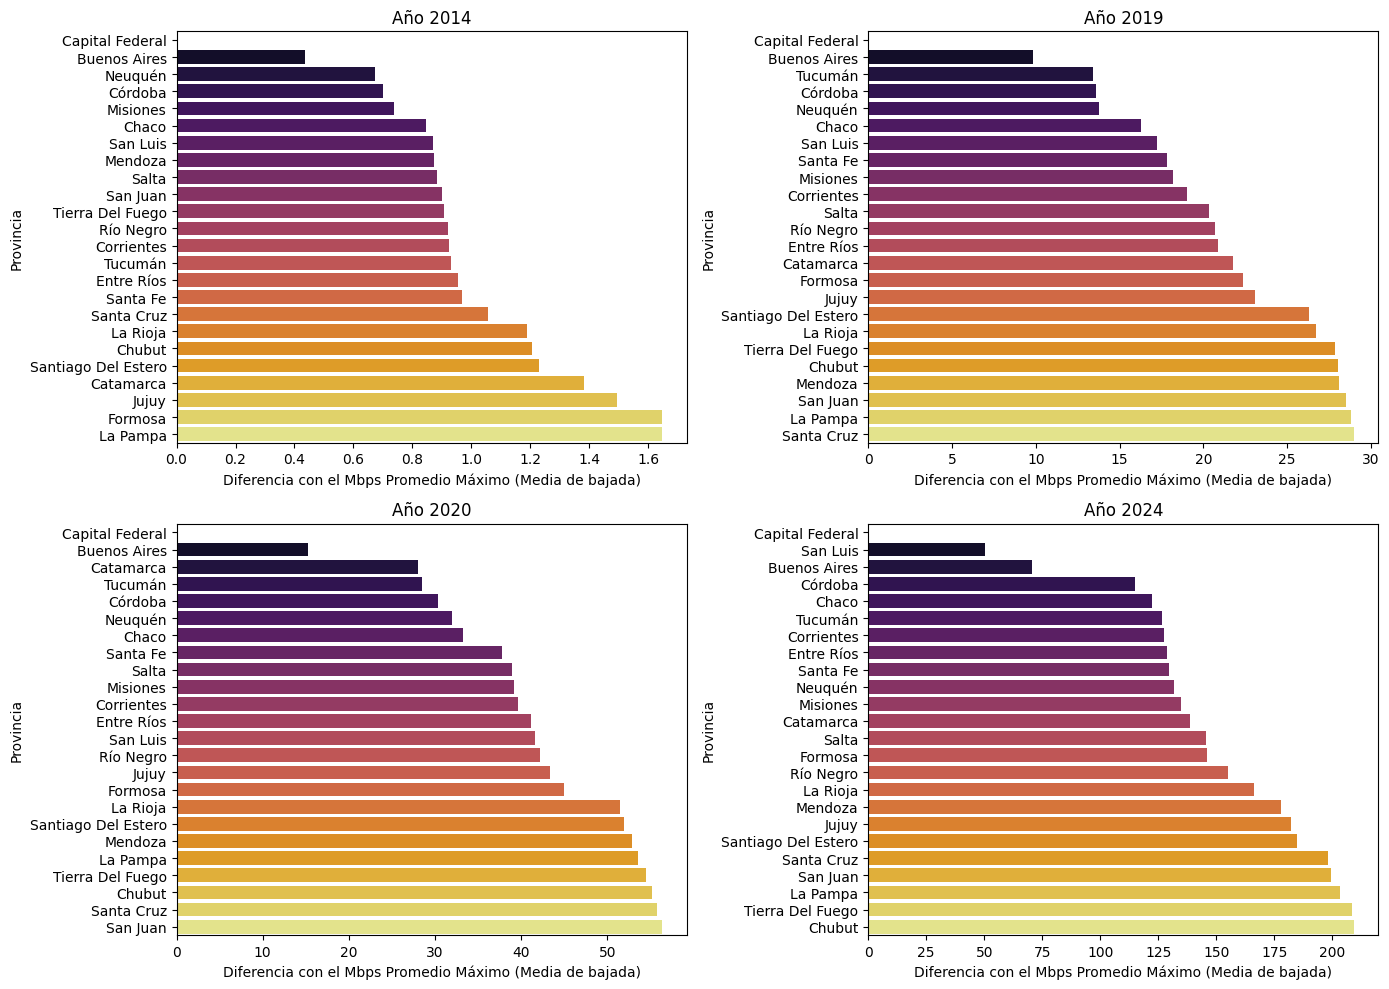

In [16]:
# Filtrar los datos para los años específicos
años_filtrados5 = [2014,2019, 2020, 2024]
df_filtrado5 = df3[df3['Año'].isin(años_filtrados5)]

# Crear figura y ejes para los gráficos distribuidos en 2 paneles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 panel

# Iterar sobre los años filtrados y crear gráficos por separado
for i, año in enumerate(años_filtrados5):
    # Filtrar datos por año
    df_año5 = df_filtrado5[df_filtrado5['Año'] == año]

    # Calcular el Mbps promedio por provincia para el año específico
    promedio_por_provincia5 = df_año5.groupby('Provincia')['Mbps (Media de bajada)'].mean()

    # Encontrar el Mbps promedio máximo
    max_mbps5 = promedio_por_provincia5.max()

    # Calcular la diferencia de cada provincia respecto al máximo
    diferencia_max_mbps5 = max_mbps5 - promedio_por_provincia5

    # Crear un DataFrame con las diferencias
    diferencia_max_mbps5_df = diferencia_max_mbps5.reset_index()
    diferencia_max_mbps5_df.columns = ['Provincia', 'Diferencia con el Mbps Máximo']

    # Ordenar el DataFrame por la columna de diferencias de menor a mayor
    diferencia_max_mbps5_df = diferencia_max_mbps5_df.sort_values(by='Diferencia con el Mbps Máximo', ascending=True)

    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Crear el gráfico de barras ordenado para el año específico
    sns.barplot(x='Diferencia con el Mbps Máximo', y='Provincia', data=diferencia_max_mbps5_df, palette='inferno', ax=ax)
    ax.set_title(f'Año {año}')
    ax.set_xlabel('Diferencia con el Mbps Promedio Máximo (Media de bajada)')
    ax.set_ylabel('Provincia')

# Ajustar los layouts para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Observaciones y Conclusiones

Los gráficos muestran la diferencia en Mbps promedio de bajada con respecto al máximo para cada provincia en los años 2014, 2019, 2020 y 2024. Este análisis permite observar la evolución de la calidad de conexión a internet en las diferentes regiones.

* Año 2014

En 2014, la brecha en la calidad de la conexión a internet es relativamente pequeña. Capital Federal y Buenos Aires presentan la menor diferencia con respecto al Mbps promedio máximo, destacándose por su calidad de conexión superior. Provincias como La Pampa, Formosa y Jujuy muestran las mayores diferencias, indicando una necesidad de mejoras significativas en estas regiones.

* Año 2019

Para 2019, se observa un incremento notable en la diferencia del Mbps promedio máximo en la mayoría de las provincias, reflejando una mejora en las conexiones de las mejores provincias pero también resaltando las disparidades regionales. Capital Federal y Buenos Aires continúan liderando con la menor diferencia, mientras que provincias como Santa Cruz, La Pampa y Mendoza aún presentan diferencias significativas.

* Año 2020

En 2020, las disparidades persisten. Sin embargo, hay una reducción en la brecha en varias provincias, señalando progresos en la calidad de las conexiones. Capital Federal sigue liderando con la mejor calidad, mientras que provincias como Santa Cruz y Chubut muestran las mayores diferencias, sugiriendo que aún queda trabajo por hacer para alcanzar la paridad nacional.

* Año 2024

Para 2024, el panorama ha mejorado notablemente en muchas provincias, aunque persisten algunas diferencias significativas. Capital Federal, San Luis y Buenos Aires presentan las menores diferencias, destacándose como líderes en calidad de conexión. Las provincias con las mayores diferencias, como Chubut y San Juan, indican áreas que necesitan mayor atención y recursos para mejorar la infraestructura de telecomunicaciones.

###Conclusión: A lo largo de la década, se han observado mejoras significativas en la calidad de conexión a internet en Argentina, aunque persisten disparidades regionales. Mientras que Capital Federal y Buenos Aires se mantienen como líderes en calidad de conexión, otras provincias como Chubut y San Juan requieren mayores inversiones en infraestructura para cerrar la brecha digital.

##Hoja Nro 7: 'Accesos Por Tecnología'
Accesos a internet por tipo de tecnología.



In [19]:
nombre_hoja = 'Accesos Por Tecnología'

# Cargar la hoja en un DataFrame
df7 = cargar_hoja_excel(ruta_archivo, nombre_hoja)


In [20]:
df7.head()

Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         1     Buenos Aires  203297.0   2790663.0     1799013.0   
1  2024         1  Capital Federal   70108.0   1177475.0      203756.0   
2  2024         1        Catamarca    5901.0     11025.0       56542.0   
3  2024         1            Chaco   11343.0     58929.0       64463.0   
4  2024         1           Chubut   26306.0     77217.0       26356.0   

   Wireless     Otros      Total  
0  150290.0  101294.0  5044557.0  
1    4493.0   48879.0  1504711.0  
2    1384.0      81.0    74933.0  
3    8404.0   12404.0   155543.0  
4   30867.0    9930.0   170676.0

In [21]:
df7.shape

(986, 9)

In [22]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


### Se eliminan datos nulos

In [23]:
#Mostrar cantidad de datos nulos por columna
df7.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [24]:
#Eliminar datos nulos
df7.dropna(inplace=True)

###Luego de la eliminación de los datos nulos se hará un análisis exhaustivo de los datos para encontrar posibles inconsistencias

In [25]:
# 1. Verificación de tipos de datos
print("Tipos de datos:")
print(df7.dtypes)

# 2. Valores nulos o faltantes
print("\nValores nulos o faltantes:")
print(df7.isnull().sum())

# 3. Verificación de totales
df7['Calculated_Total'] = df7['ADSL'] + df7['Cablemodem'] + df7['Fibra óptica'] + df7['Wireless'] + df7['Otros']
df7['Total_Mismatch'] = df7['Calculated_Total'] != df7['Total']
inconsistencias_total = df7[df7['Total_Mismatch']]

print("\nInconsistencias en los totales:")
print(inconsistencias_total[['Año', 'Trimestre', 'Provincia', 'Total', 'Calculated_Total']])

# 4. Duplicados
duplicados = df7.duplicated()
if duplicados.any():
    print("\nFilas duplicadas:")
    print(df7[duplicados])
else:
    print("\nNo hay filas duplicadas.")

# 5. Valores fuera de rango (negativos)
columnas_numericas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
valores_fuera_de_rango = df7[(df7[columnas_numericas] < 0).any(axis=1)]

if not valores_fuera_de_rango.empty:
    print("\nValores fuera de rango (negativos):")
    print(valores_fuera_de_rango)
else:
    print("\nNo hay valores fuera de rango (negativos).")


Tipos de datos:
Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

Valores nulos o faltantes:
Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Inconsistencias en los totales:
Empty DataFrame
Columns: [Año, Trimestre, Provincia, Total, Calculated_Total]
Index: []

No hay filas duplicadas.

No hay valores fuera de rango (negativos).


In [26]:
# Convertir la columna 'Año' a   dato numérico
df7['Año'] = df7['Año'].replace('[^0-9]', '', regex=True).astype(int)

# Verificar el cambio
print(df7.dtypes)

Año                   int64
Trimestre            object
Provincia            object
ADSL                float64
Cablemodem          float64
Fibra óptica        float64
Wireless            float64
Otros               float64
Total               float64
Calculated_Total    float64
Total_Mismatch         bool
dtype: object


In [27]:
# Eliminar las columnas 'Calculated_Total' y 'Total_Mismatch'
df7 = df7.drop(columns=['Calculated_Total', 'Total_Mismatch'], errors='ignore')

In [28]:
# Verificar si hay valores nulos en la columna 'Año'
df7['Año'].isnull().sum()

0

In [29]:
df7[df7['Año'].isnull()]

Empty DataFrame
Columns: [Año, Trimestre, Provincia, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total]
Index: []

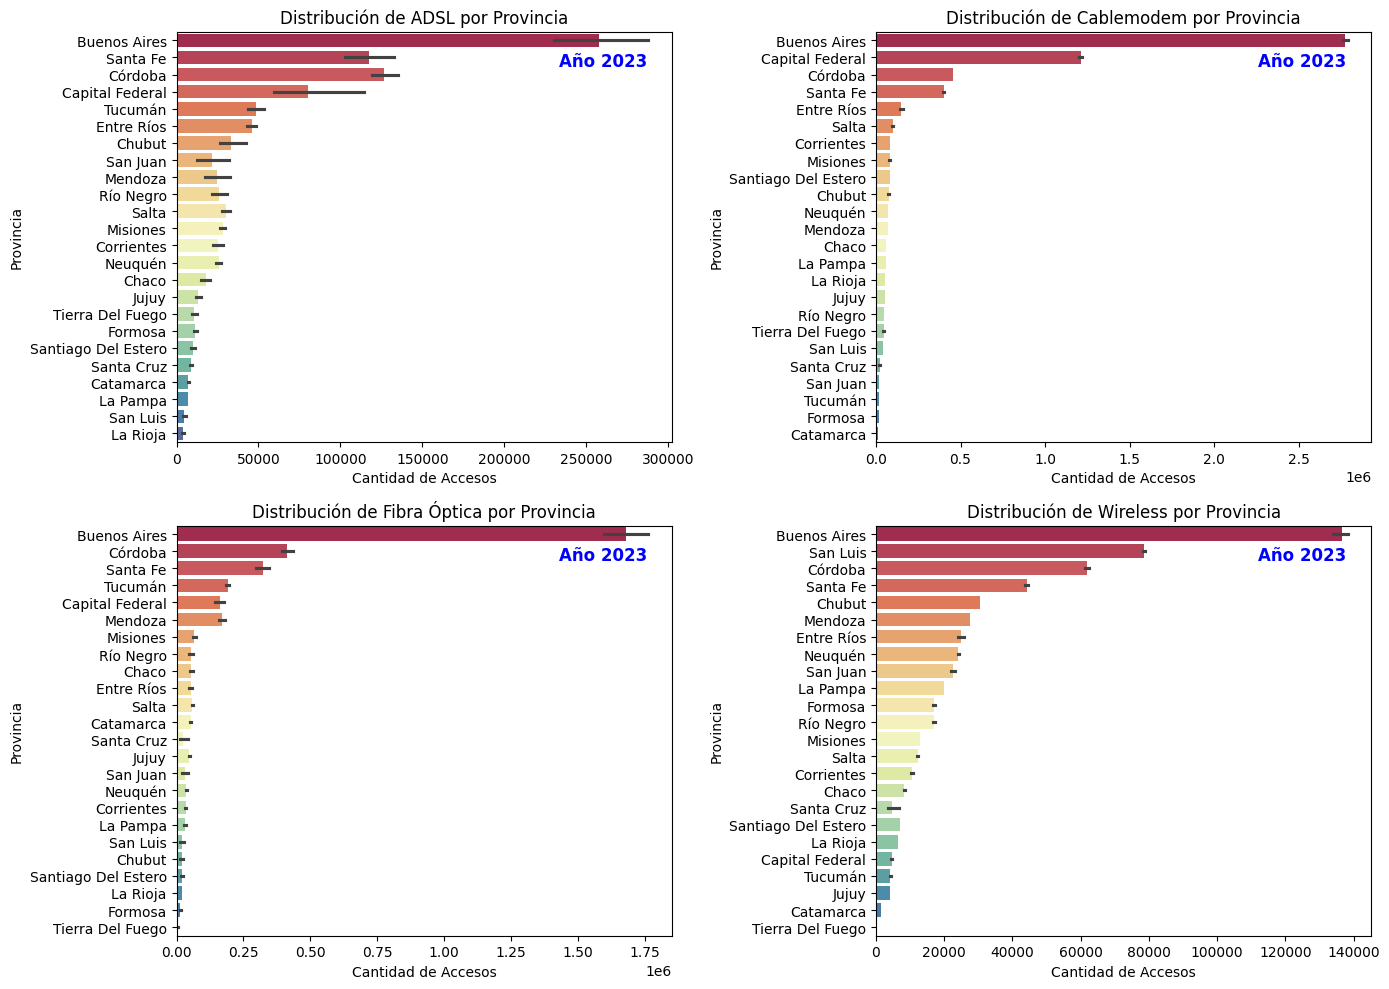

In [30]:
# Filtrar el DataFrame para incluir solo el año 2023
df_2023 = df7[df7['Año'] == 2023]

# Crear una figura con dos paneles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Definir los tipos de conexiones
tipos_conexiones = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
titulos = ['Distribución de ADSL por Provincia', 'Distribución de Cablemodem por Provincia',
           'Distribución de Fibra Óptica por Provincia', 'Distribución de Wireless por Provincia']

# Iterar sobre cada tipo de conexión y crear gráficos de barras
for i, tipo in enumerate(tipos_conexiones):
    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Ordenar los datos por el tipo de conexión en orden descendente
    df_sorted = df_2023.sort_values(by=tipo, ascending=False)

    # Crear el gráfico de barras para el tipo de conexión actual
    sns.barplot(x=tipo, y='Provincia', data=df_sorted, ax=ax, palette='Spectral')

    # Configurar el título y las etiquetas
    ax.set_title(titulos[i])
    ax.set_xlabel('Cantidad de Accesos')
    ax.set_ylabel('Provincia')

    # Agregar una leyenda o anotación para el año 2023
    ax.text(0.95, 0.95, 'Año 2023', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=12, color='blue', weight='bold')

# Ajustar los layouts para que no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


###**Conclusiones y Observaciones de la gráfica anterior para el año 2023**
* Gráfico de ADSL

1. Provincias Destacadas: Buenos Aires, Santa Fe y Córdoba lideran con la mayor cantidad de accesos, con Buenos Aires teniendo una ventaja considerable.
2. Provincias con Menores Accesos: La Rioja, San Luis y Catamarca están al final de la lista, indicando un menor despliegue de ADSL en estas regiones.


* Gráfico de Cablemodem
1. Provincias Destacadas: Buenos Aires y Capital Federal encabezan la lista, con Buenos Aires nuevamente en primer lugar.
2. Provincias con Menores Accesos: Catamarca, Formosa y Tucumán tienen las menores cantidades de accesos, lo que puede sugerir una menor infraestructura o preferencia por otros tipos de conexiones.

* Gráfico de Fibra Óptica
1. Provincias Destacadas: Buenos Aires se mantiene como la provincia con más accesos, seguida por Córdoba y Santa Fe.
2. Provincias con Menores Accesos: Tierra del Fuego, Formosa y La Rioja muestran los accesos más bajos, lo cual puede deberse a desafíos en la instalación de infraestructura de fibra óptica en estas áreas.

* Gráfico de Wireless
1. Provincias Destacadas: Buenos Aires y San Luis lideran en accesos, lo que sugiere una fuerte preferencia o necesidad de conexiones inalámbricas.
2. Provincias con Menores Accesos: Tierra del Fuego, Catamarca y Jujuy tienen los menores accesos, posiblemente debido a la falta de infraestructura o dificultades geográficas.

###Observaciones Generales
1. Consistencia: Buenos Aires aparece constantemente como la provincia con más accesos en todos los tipos de conexión, lo que indica una infraestructura de telecomunicaciones bien desarrollada y una alta demanda de servicios de internet.
2. Disparidades Regionales: Hay una notable disparidad entre las provincias en cuanto al acceso a diferentes tipos de conexiones, lo cual podría ser un indicador de las diferencias en desarrollo tecnológico e infraestructura entre las regiones.

####**Conclusión:** Este análisis sugiere que mientras algunas provincias tienen acceso robusto a múltiples tipos de conexiones, otras todavía están rezagadas, lo que puede tener implicaciones para la equidad digital y el desarrollo regional.

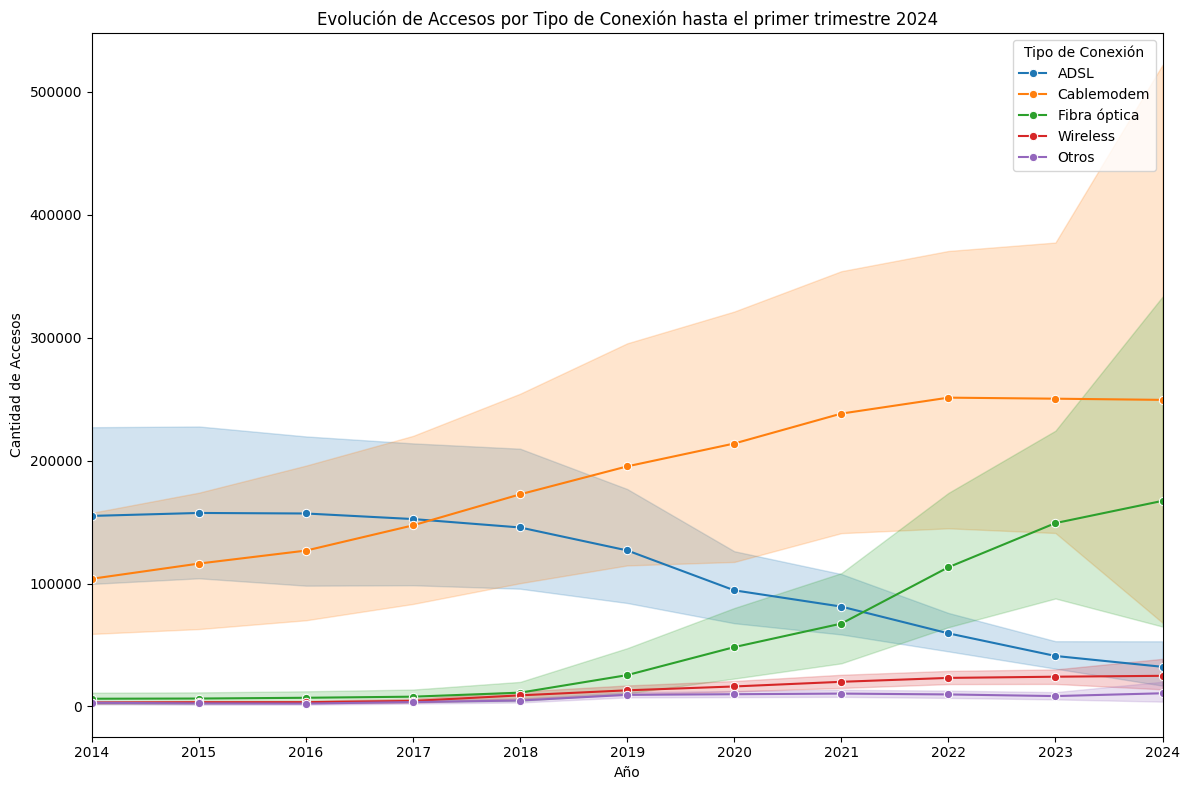

In [31]:
# Filtrar el DataFrame para mostrar solo hasta el año 2024
df7_filtrado = df7[df7['Año'] <= 2024]

# Crear una figura
plt.figure(figsize=(12, 8))

# Plotear las líneas para cada tipo de conexión
sns.lineplot(data=df7_filtrado, x='Año', y='ADSL', label='ADSL', marker='o')
sns.lineplot(data=df7_filtrado, x='Año', y='Cablemodem', label='Cablemodem', marker='o')
sns.lineplot(data=df7_filtrado, x='Año', y='Fibra óptica', label='Fibra óptica', marker='o')
sns.lineplot(data=df7_filtrado, x='Año', y='Wireless', label='Wireless', marker='o')
sns.lineplot(data=df7_filtrado, x='Año', y='Otros', label='Otros', marker='o')

# Configurar el rango del eje x para asegurarse de que se incluya 2023
plt.xlim(df7_filtrado['Año'].min(), 2024)

# Configurar las etiquetas del eje x para asegurarse de que 2023 esté presente
plt.xticks(range(df7_filtrado['Año'].min(), 2025))

# Configurar título, etiquetas y leyenda
plt.title('Evolución de Accesos por Tipo de Conexión hasta el primer trimestre 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')
plt.legend(title='Tipo de Conexión')

# Ajustar el layout para que no se superpongan elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()



###**Observaciones y Conclusiones de la gráfica anterior**
* Tipos de Conexión
1. ADSL (Azul): Se observa una tendencia a la baja a lo largo de los años. ADSL parece estar siendo reemplazado progresivamente por tecnologías más avanzadas.
2. Cablemodem (Naranja): Muestra una tendencia de crecimiento sostenido, aunque el crecimiento se ha estabilizado en los últimos años.
3. Fibra Óptica (Verde): Esta tecnología muestra un crecimiento constante y significativo, especialmente en los últimos años, indicando una adopción creciente de esta tecnología.
4. Wireless (Rojo) y Otros (Morado): Ambas categorías tienen una representación mucho más pequeña en comparación con las otras tecnologías, y sus variaciones a lo largo del tiempo son menos pronunciadas.
* Tendencias Generales:

 a) Crecimiento de la Fibra Óptica: La fibra óptica es la tecnología con mayor crecimiento en el período analizado. Esto refleja una tendencia global hacia la adopción de conexiones más rápidas y estables.

 b) Estabilización y Disminución de ADSL: ADSL, que fue muy popular en años anteriores, está perdiendo cuota de mercado a medida que los usuarios migran a tecnologías más modernas como la fibra óptica y el cablemodem.

 c) Cablemodem Estable: El Cablemodem sigue siendo una opción popular y su adopción ha sido constante, aunque parece estar estabilizándose en los años recientes.

 d) Wireless y Otros: Estas conexiones parecen ser de menor impacto en comparación con las demás, y no muestran cambios significativos en la adopción.

*  Incertidumbre y Variabilidad:

Las áreas sombreadas alrededor de cada línea indican una banda de incertidumbre o variabilidad, lo que puede sugerir fluctuaciones en los datos o la inclusión de múltiples puntos de datos agregados.
* Consideraciones:

Datos hasta el Primer Trimestre de 2024: La gráfica llega hasta el 2024, lo cual es útil para observar las tendencias más recientes. Sin embargo, dado que el 2024 solo incluye el primer trimestre, los datos para ese año pueden no ser completos o representativos del año completo.

####Conclusión: La gráfica proporciona una visión clara de cómo ha cambiado la adopción de las diferentes tecnologías de conexión a internet a lo largo de los años. La fibra óptica está en clara expansión, mientras que el ADSL está en declive. Cablemodem sigue siendo fuerte, aunque con un crecimiento más moderado. Las tecnologías wireless y otras alternativas tienen una participación marginal y estable en el mercado.

##Hoja Nro 10: 'Penetración-poblacion'
Penetración de internet en la población.

In [32]:
nombre_hoja = 'Penetración-poblacion'

#Cargar la hoja en un DataFrame
df10 = cargar_hoja_excel(ruta_archivo, nombre_hoja)

In [33]:
#Mostrar cantidad de filas y columnas
df10.shape

(984, 4)

In [34]:
#Inspeccionar el df10 en forma rápida
df10.head()

Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          1     Buenos Aires                     27.80
1  2024          1  Capital Federal                     48.78
2  2024          1        Catamarca                     17.50
3  2024          1            Chaco                     12.48
4  2024          1           Chubut                     26.02

In [35]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


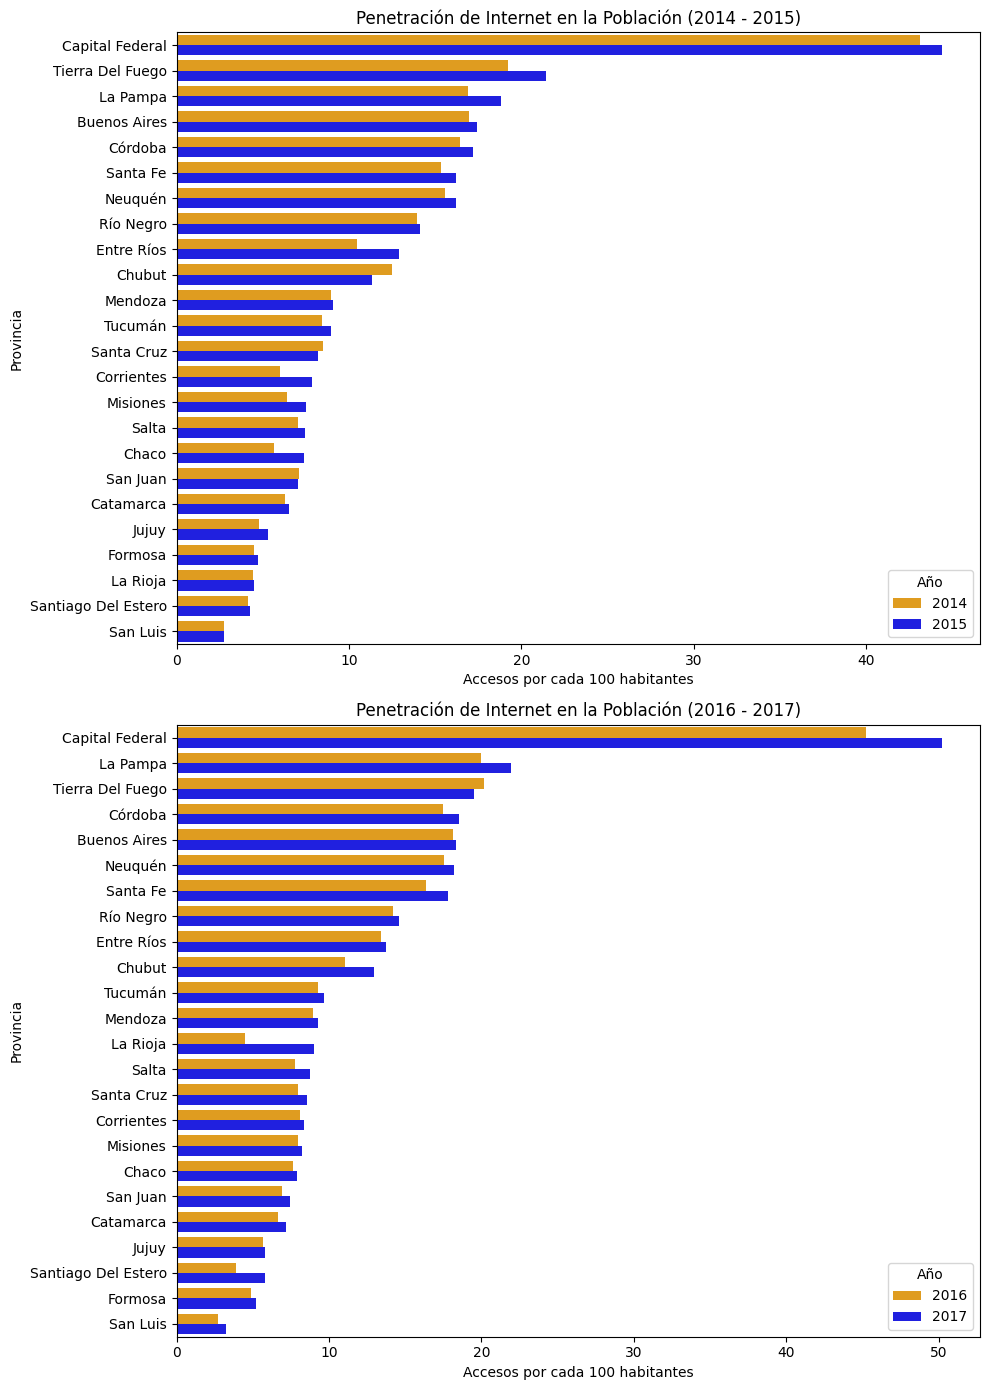

In [36]:
# Filtrar datos hasta el 2023
df10_filtrado = df10[df10['Año'] <= 2023]

# Agrupar por año y provincia para obtener la media de accesos por cada 100 habitantes
df10_agrupado = df10_filtrado.groupby(['Año', 'Provincia'], as_index=False)['Accesos por cada 100 hab'].mean()

# Crear una figura con dos paneles
fig, axes = plt.subplots(2, 1, figsize=(10, 14))

# Obtener los años únicos para crear los gráficos por año
years = sorted(df10_agrupado['Año'].unique())

# Definir una paleta de colores personalizada o usar una paleta predefinida de seaborn
paleta_personalizada = ["#FFA500", "#0000FF"]  # Ejemplo de paleta personalizada

# Graficar cada año en un panel diferente
for i, ax in enumerate(axes):
    year_data = df10_agrupado[df10_agrupado['Año'].isin(years[i*2:i*2+2])]

    # Ordenar los datos por accesos por cada 100 habitantes
    year_data_sorted = year_data.sort_values('Accesos por cada 100 hab', ascending=False)

    # Crear gráfico de barras
    sns.barplot(
        data=year_data_sorted,
        x='Accesos por cada 100 hab',
        y='Provincia',
        hue='Año',
        ax=ax,
        palette=paleta_personalizada
    )

    # Configurar el título de cada panel
    ax.set_title(f'Penetración de Internet en la Población ({years[i*2]} - {years[i*2+1]})')
    ax.set_xlabel('Accesos por cada 100 habitantes')
    ax.set_ylabel('Provincia')

    # Ajustar la leyenda
    ax.legend(title='Año')

# Ajustar el layout para evitar superposición de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


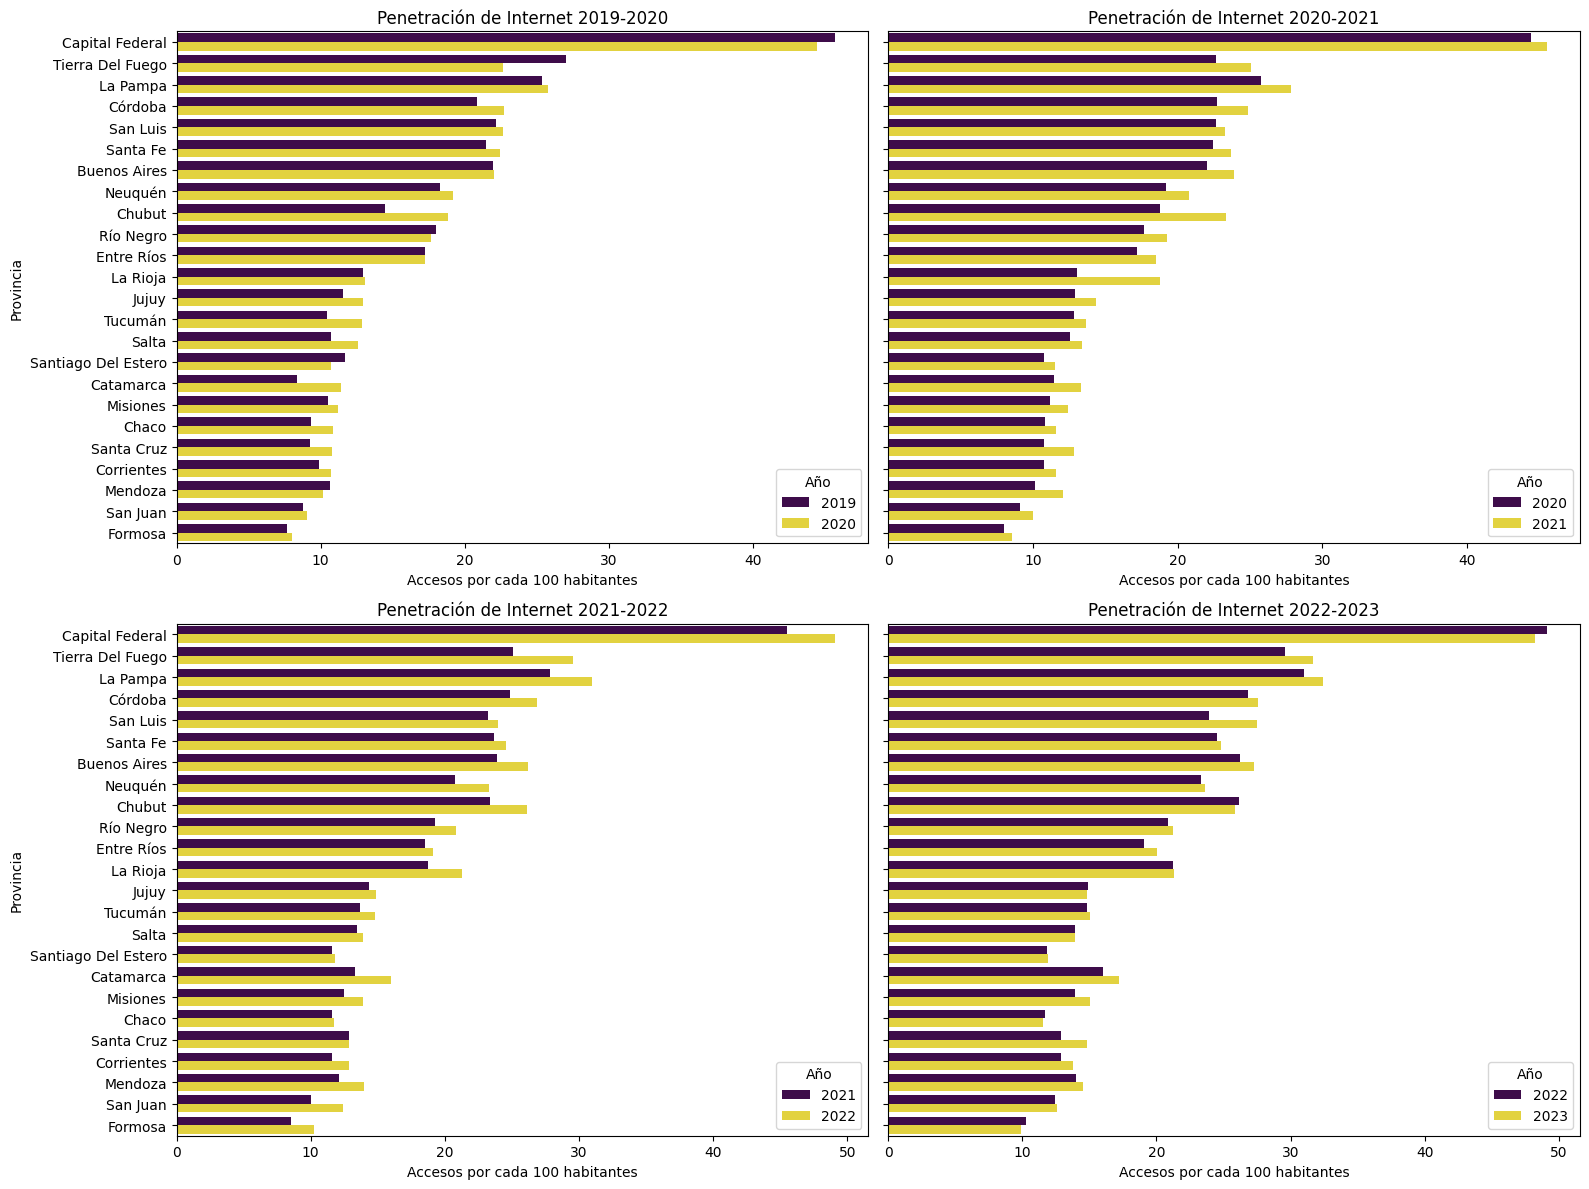

In [37]:
# Filtrar datos desde 2019 hasta 2023
df10_filtrado = df10[(df10['Año'] >= 2019) & (df10['Año'] <= 2023)]

# Agrupar por año y provincia para obtener la media de accesos por cada 100 habitantes
df10_agrupado = df10_filtrado.groupby(['Año', 'Provincia'], as_index=False)['Accesos por cada 100 hab'].mean()

# Crear una figura con dos paneles
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)  # 2 filas, 2 columnas

# Definir los rangos de años para cada panel
year_ranges = [(2019, 2020), (2020, 2021), (2021, 2022), (2022, 2023)]

# Graficar cada rango de años en su panel correspondiente
for i, (start_year, end_year) in enumerate(year_ranges):
    # Seleccionar el subplot adecuado
    ax = axes[i // 2, i % 2]

    # Filtrar datos para el rango de años actual
    year_data = df10_agrupado[(df10_agrupado['Año'] >= start_year) & (df10_agrupado['Año'] <= end_year)]

    # Ordenar los datos por accesos por cada 100 habitantes
    year_data_sorted = year_data.sort_values('Accesos por cada 100 hab', ascending=False)

    # Crear gráfico de barras
    sns.barplot(
        data=year_data_sorted,
        x='Accesos por cada 100 hab',
        y='Provincia',
        hue='Año',
        ax=ax,
        palette='viridis'  # Usar una paleta de colores llamativa
    )

    # Configurar el título de cada panel
    ax.set_title(f'Penetración de Internet {start_year}-{end_year}')
    ax.set_xlabel('Accesos por cada 100 habitantes')
    ax.set_ylabel('Provincia')

    # Ajustar la leyenda
    ax.legend(title='Año')

# Ajustar el layout para evitar superposición de elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


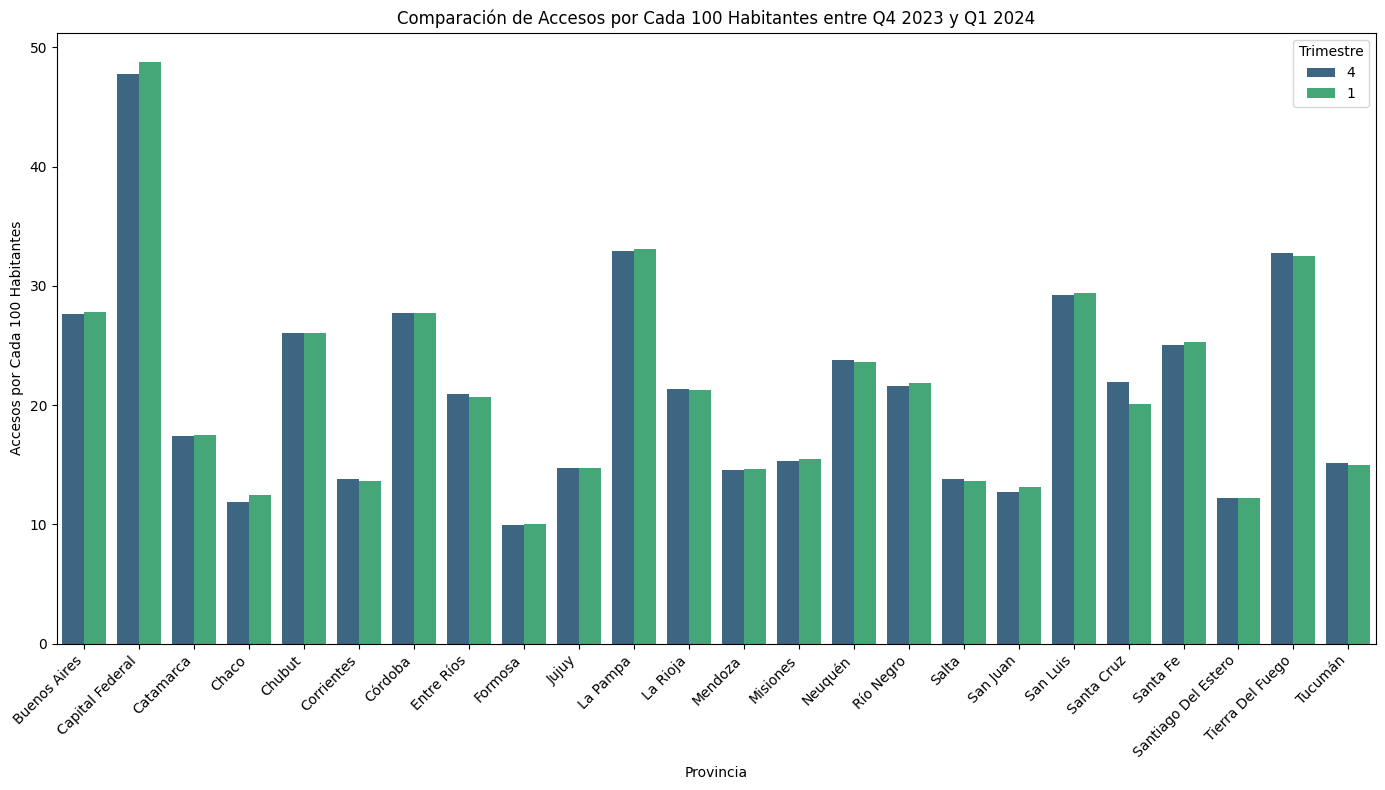

In [38]:

# Filtrar solo los trimestres de interés: Q4 2023 y Q1 2024
df_filtrado = df10[((df10['Año'] == 2023) & (df10['Trimestre'] == 4)) | ((df10['Año'] == 2024) & (df10['Trimestre'] == 1))]

# Agrupar por año, trimestre y provincia para obtener la media de accesos por cada 100 habitantes
df_agrupado = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False)['Accesos por cada 100 hab'].mean()

# Ordenar los datos para asegurar que las barras aparezcan en el orden deseado
df_agrupado['Trimestre'] = pd.Categorical(df_agrupado['Trimestre'], categories=[4, 1], ordered=True)
df_agrupado.sort_values(['Provincia', 'Año', 'Trimestre'], inplace=True)

# Crear gráfico de barras para comparar los dos trimestres
plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=df_agrupado, x='Provincia', y='Accesos por cada 100 hab', hue='Trimestre', palette='viridis', hue_order=[4, 1])

# Configurar título y etiquetas
plt.title('Comparación de Accesos por Cada 100 Habitantes entre Q4 2023 y Q1 2024')
plt.xlabel('Provincia')
plt.ylabel('Accesos por Cada 100 Habitantes')

# Ajustar las etiquetas del eje X
ticks = barplot.get_xticks()
labels = [item.get_text() for item in barplot.get_xticklabels()]
barplot.set_xticks(ticks)
barplot.set_xticklabels(labels, rotation=45, ha='right')

# Mostrar leyenda
plt.legend(title='Trimestre', loc='upper right')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


<ipython-input-39-f206c93d6b39>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_agrupado, x='Trimestre_Año', y='Accesos por cada 100 hab', marker='o', sort=False, palette='viridis')


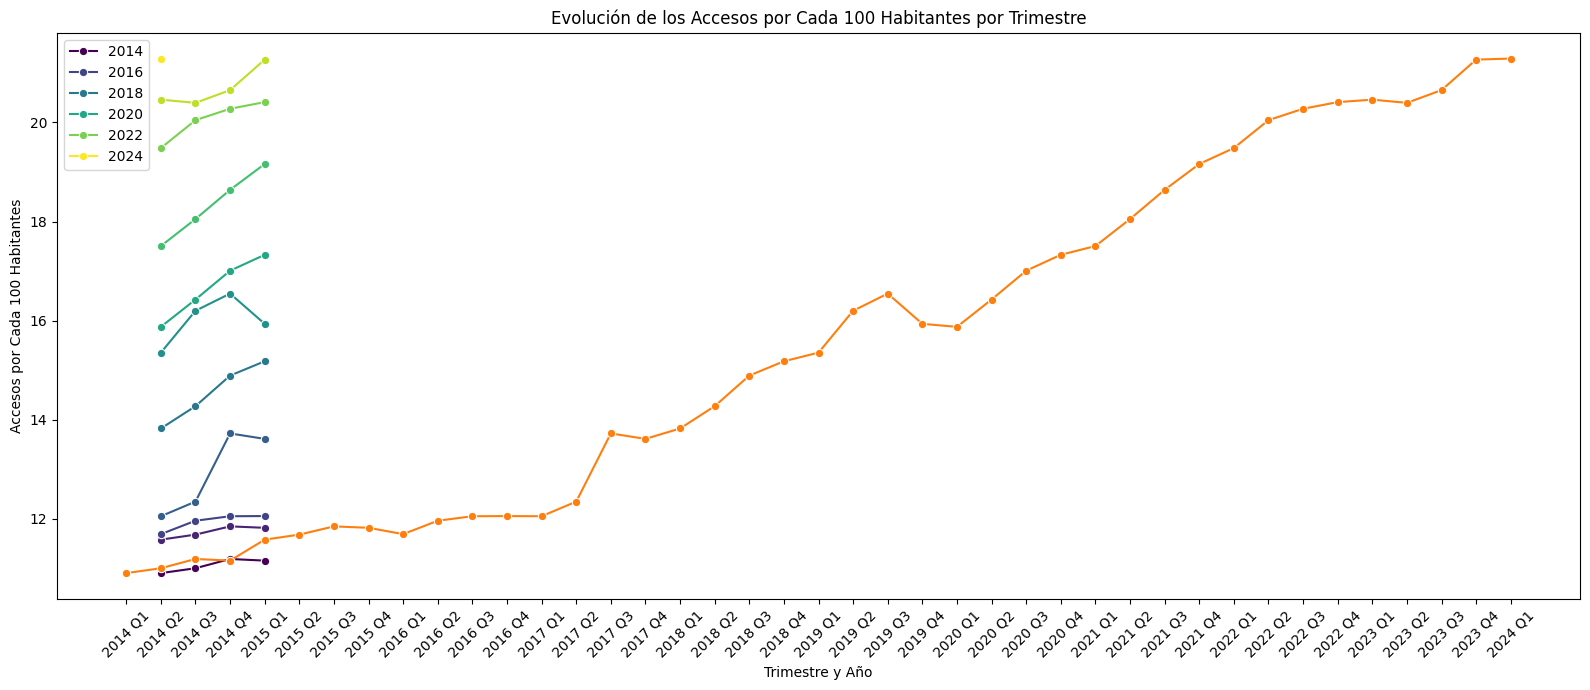

In [39]:

# Agrupar por año y trimestre para obtener la media de accesos por cada 100 habitantes
df_agrupado = df10.groupby(['Año', 'Trimestre'], as_index=False)['Accesos por cada 100 hab'].mean()

# Crear un lineplot para mostrar la evolución de los accesos por cada 100 habitantes
plt.figure(figsize=(16, 7))
lineplot = sns.lineplot(data=df_agrupado, x='Trimestre', y='Accesos por cada 100 hab', hue='Año', marker='o', palette='viridis')

# Crear una columna 'Trimestre_Año' para tener una etiqueta unificada de cada punto en el eje x
df_agrupado['Trimestre_Año'] = df_agrupado['Año'].astype(str) + ' Q' + df_agrupado['Trimestre'].astype(str)

# Dibujar la línea
sns.lineplot(data=df_agrupado, x='Trimestre_Año', y='Accesos por cada 100 hab', marker='o', sort=False, palette='viridis')

# Configurar las etiquetas y títulos del gráfico
plt.title('Evolución de los Accesos por Cada 100 Habitantes por Trimestre')
plt.xlabel('Trimestre y Año')
plt.ylabel('Accesos por Cada 100 Habitantes')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor visualización

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Obervaciones
Los gráficos proporcionan una visión clara de la evolución de la penetración de internet en Argentina, desglosada por provincias y años.

* Se observa un incremento generalizado en la penetración de internet en todas las provincias de 2019 a 2023.

* Capital Federal y Tierra del Fuego lideran consistentemente en términos de accesos por cada 100 habitantes, mostrando los valores más altos de penetración.
Mejoras Notables en Provincias Rezagadas:

* Provincias como La Pampa y Río Negro han mostrado mejoras significativas, acercándose al nivel de las provincias líderes.
}
* Otras provincias, como Formosa y San Juan, aún presentan niveles más bajos de penetración, aunque también han experimentado incrementos.

* Se observa un crecimiento continuo en los accesos por cada 100 habitantes desde 2014 hasta el primer trimestre de 2024. A partir de 2019, se evidencia una aceleración en el crecimiento, destacando una tendencia positiva en la adopción de servicios de internet.

* Se identifican patrones estacionales con incrementos más pronunciados en ciertos trimestres.

##Hoja Nro 11: 'Penetracion-hogares'
Penetración de internet en hogares.


In [40]:
nombre_hoja = 'Penetracion-hogares'

#Cargar la hoja en un DataFrame
df11 = cargar_hoja_excel(ruta_archivo, nombre_hoja)

In [41]:
#Mostrar cantidad de filas y columnas
df11.shape

(984, 4)

In [42]:
#Inspeccionar el df11 en forma rápida
df11.head()

Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          1     Buenos Aires                         81.10
1  2024          1  Capital Federal                        119.53
2  2024          1        Catamarca                         68.82
3  2024          1            Chaco                         46.70
4  2024          1           Chubut                         84.89

In [43]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


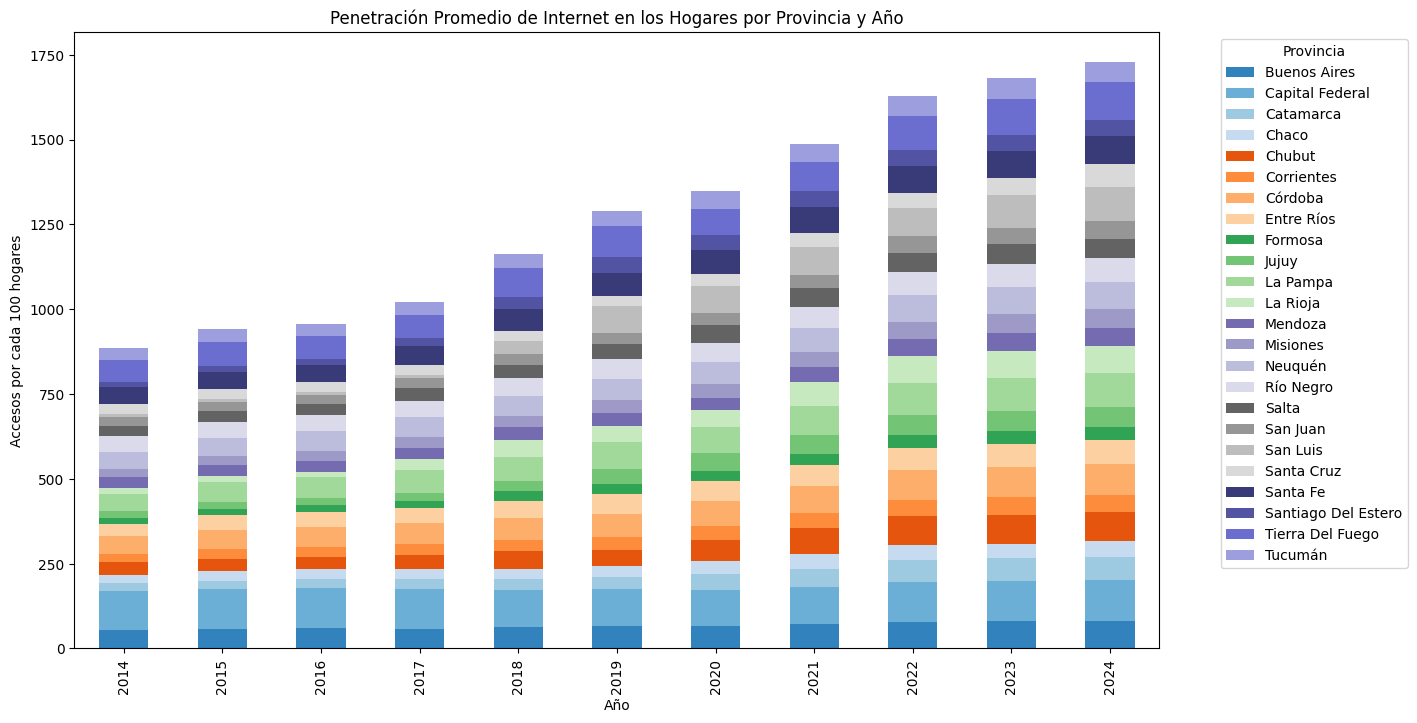

In [44]:

df_agrupado = df11.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].mean().unstack().fillna(0)

# Generar una paleta de colores combinando 'tab20c' y 'tab20b' para obtener 24 colores
base_palette = sns.color_palette("tab20c", 20)
additional_colors = sns.color_palette("tab20b", 4)  # Añadir 4 colores más
full_palette = base_palette + additional_colors

# Crear el gráfico de barras apiladas usando la paleta definida
ax = df_agrupado.plot(kind='bar', stacked=True, figsize=(14, 8), color=full_palette)

# Configurar título y etiquetas
plt.title('Penetración Promedio de Internet en los Hogares por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

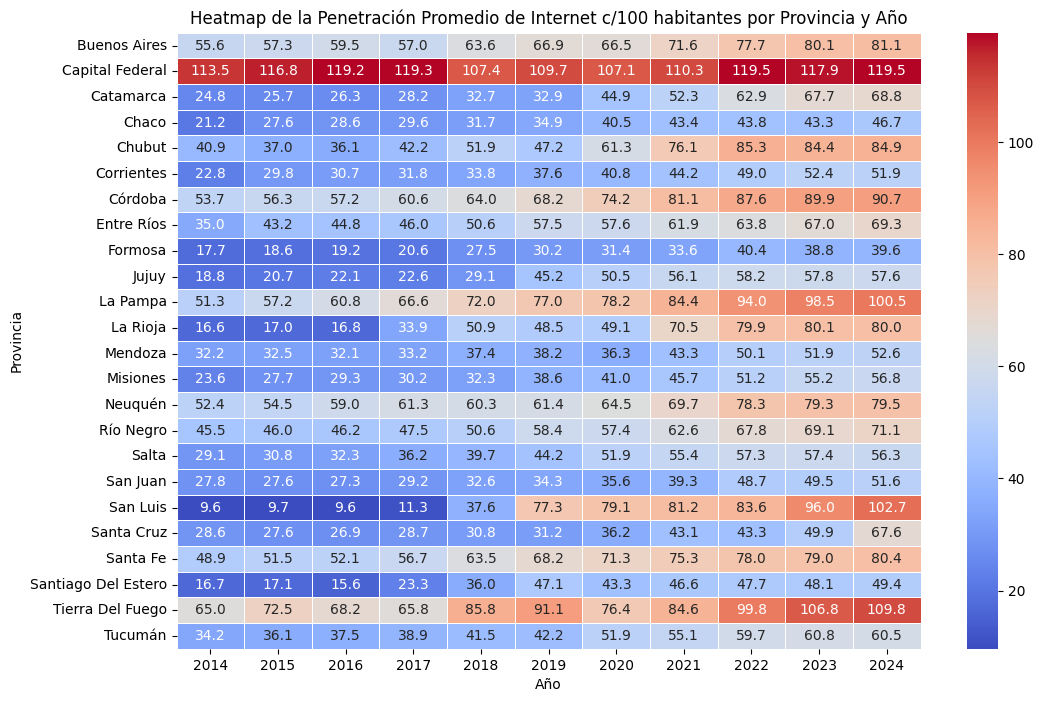

In [45]:
# Crear un heatmap de la penetración de internet
heatmap_data = df11.pivot_table(index='Provincia', columns='Año', values='Accesos por cada 100 hogares', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Heatmap de la Penetración Promedio de Internet c/100 habitantes por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Provincia')
plt.show()

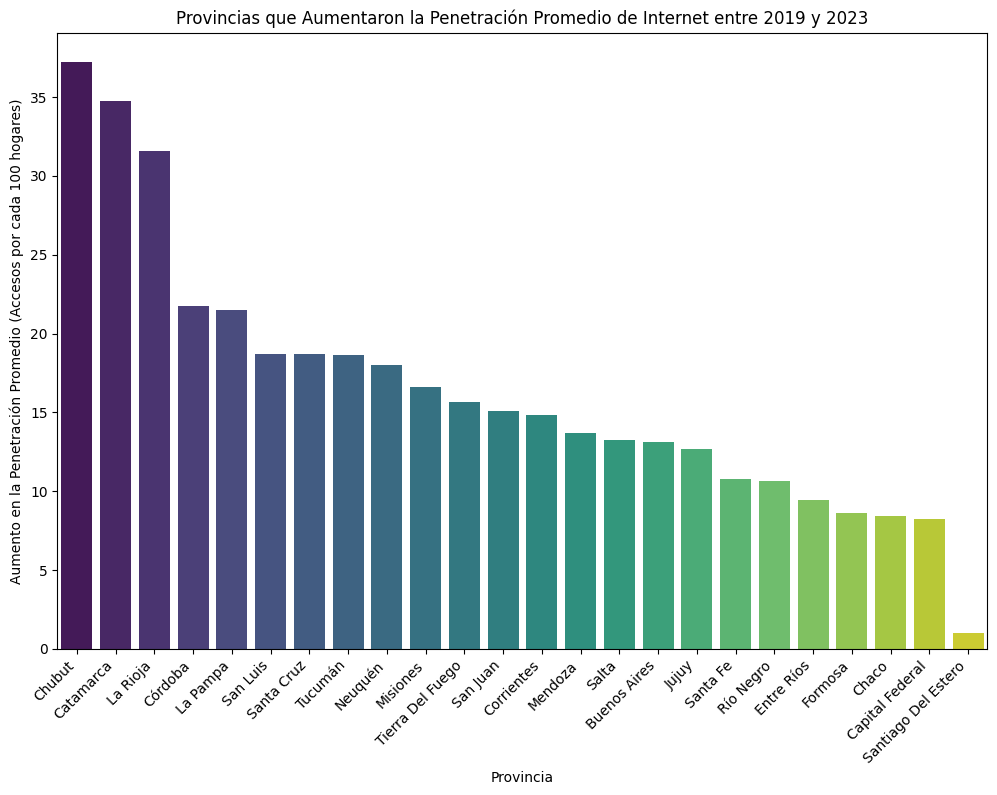

In [46]:
# Filtrar datos para los años 2019 y 2023
df_filtrado = df11[(df11['Año'] == 2019) | (df11['Año'] == 2023)]

# Agrupar por año y provincia para obtener la media de accesos por cada 100 hogares
df_agrupado = df_filtrado.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].mean().unstack()

# Calcular la diferencia en la penetración de internet entre 2023 y 2019
diferencia = df_agrupado.loc[2023] - df_agrupado.loc[2019]

# Filtrar para mantener solo las provincias con un aumento en la penetración
aumento = diferencia[diferencia > 0].sort_values(ascending=False)

# Crear un gráfico de barras para mostrar las provincias con aumento
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=aumento.index, y=aumento.values, palette='viridis')
plt.title('Provincias que Aumentaron la Penetración Promedio de Internet entre 2019 y 2023')
plt.xlabel('Provincia')
plt.ylabel('Aumento en la Penetración Promedio (Accesos por cada 100 hogares)')

# Ajustar las etiquetas del eje X correctamente
ticks = range(len(aumento.index))  # Crear una lista de posiciones de ticks para cada provincia
barplot.set_xticks(ticks)  # Fijar los localizadores a estas posiciones
barplot.set_xticklabels(aumento.index, rotation=45, horizontalalignment='right')  # Establecer las etiquetas

# Mostrar el gráfico
plt.show()

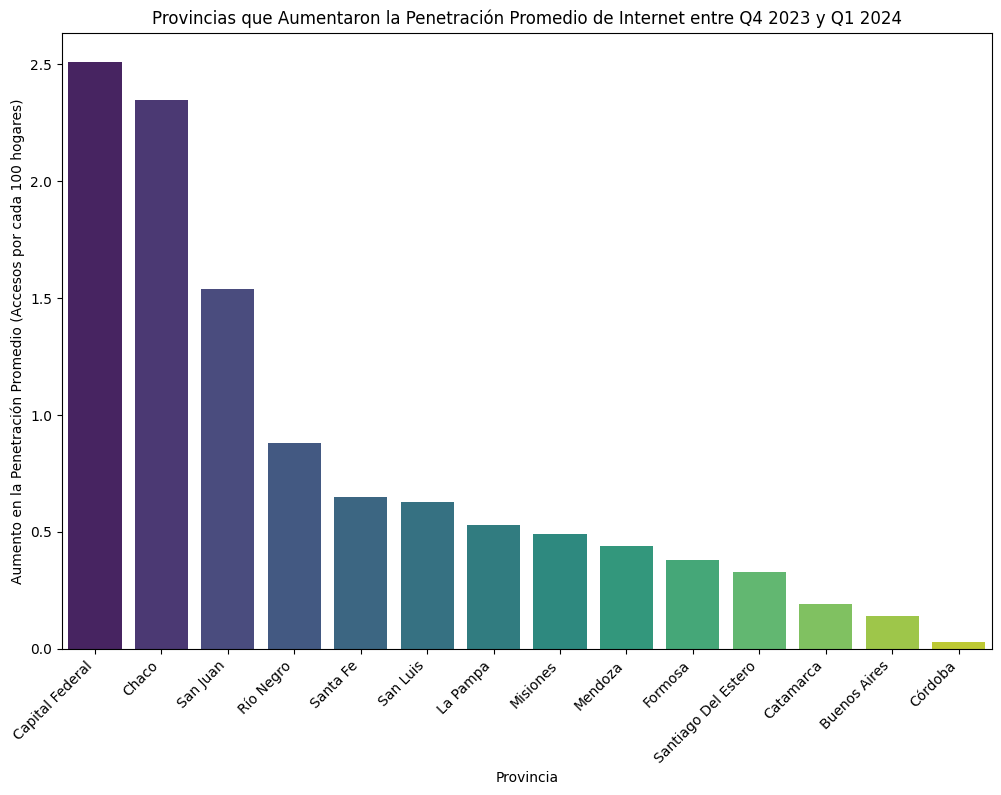

In [47]:
# Filtrar datos para los trimestres Q4 2023 y Q1 2024
df_filtrado = df11[((df11['Año'] == 2023) & (df11['Trimestre'] == 4)) | ((df11['Año'] == 2024) & (df11['Trimestre'] == 1))]

# Agrupar por año, trimestre y provincia para obtener la media de accesos por cada 100 hogares
df_agrupado = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'])['Accesos por cada 100 hogares'].mean().reset_index()

# Convertir el DataFrame agrupado en un pivote para facilitar la comparación
df_pivote = df_agrupado.pivot_table(index='Provincia', columns=['Año', 'Trimestre'], values='Accesos por cada 100 hogares')

# Calcular la diferencia en la penetración de internet entre Q1 2024 y Q4 2023
diferencia = df_pivote[(2024, 1)] - df_pivote[(2023, 4)]

# Filtrar para mantener solo las provincias con un aumento en la penetración
aumento = diferencia[diferencia > 0].sort_values(ascending=False)

# Verificar si hay datos para mostrar
if aumento.empty:
    print("No hay provincias que mostraron un aumento de penetración de Internet entre Q4 2023 y Q1 2024.")
else:
    # Crear un gráfico de barras para mostrar las provincias con aumento
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x=aumento.index, y=aumento.values, palette='viridis')
    plt.title('Provincias que Aumentaron la Penetración Promedio de Internet entre Q4 2023 y Q1 2024')
    plt.xlabel('Provincia')
    plt.ylabel('Aumento en la Penetración Promedio (Accesos por cada 100 hogares)')

    # Ajustar las etiquetas del eje X correctamente
    ticks = range(len(aumento.index))  # Crear una lista de posiciones de ticks para cada provincia
    barplot.set_xticks(ticks)  # Fijar los localizadores a estas posiciones
    barplot.set_xticklabels(aumento.index, rotation=45, horizontalalignment='right')  # Establecer las etiquetas

    # Mostrar el gráfico
    plt.show()

###**Observaciones y Conclusiones**

* Crecimiento Sostenido:

 La penetración promedio de internet en los hogares ha mostrado un crecimiento sostenido desde 2014 hasta 2024.
 El aumento es notable en los últimos años, especialmente a partir de 2020.

* Desigualdad Regional:

 Aunque todas las provincias muestran un crecimiento, la penetración es más alta en provincias como Buenos Aires y Capital Federal.
 Las provincias con menor crecimiento relativo, como Catamarca y La Rioja, también han mejorado, pero a un ritmo más lento.

* Liderazgo de Capital Federal y Buenos Aires:

 Capital Federal y Buenos Aires tienen los mayores valores de penetración, superando consistentemente a otras provincias.
 La penetración en Capital Federal alcanza valores superiores a 100 accesos por cada 100 hogares.

* Mejoras Significativas en Provincias con Baja Penetración:

 Provincias como La Rioja, Formosa y Misiones han mostrado mejoras significativas en los últimos años, acercándose al promedio nacional.
 La Pampa y Tierra del Fuego también destacan por su crecimiento rápido en la penetración de internet.

* Disparidades Persistentes:

 Persisten disparidades entre las provincias, aunque la brecha se ha reducido en los últimos años.
 Las provincias con menor penetración al inicio del periodo han tenido mejoras, pero aún necesitan mayor enfoque para alcanzar los niveles de las provincias líderes.


 ### **Conclusiones:** Se destaca el progreso en la expansión de la infraestructura de internet en Argentina, pero también hay que subrayar la necesidad de continuar invirtiendo en regiones menos desarrolladas para asegurar un acceso equitativo a internet en todo el país.

#**Calcular KPI 1**
Aumentar el 2% los accesos a internet para provincias con baja penetración

In [48]:
# Calcular la mediana de "Accesos por cada 100 hogares"
mediana_accesos = df11['Accesos por cada 100 hogares'].median()

# Identificar las provincias con baja penetración (por debajo de la mediana)
provincias_baja_penetracion = df11[df11['Accesos por cada 100 hogares'] < mediana_accesos]['Provincia']

# Crear una copia del DataFrame original para el nuevo DataFrame de resultados
df_kpi = df11.copy()

# Calcular el nuevo valor de acceso con el aumento del 2% para provincias con baja penetración
df_kpi['Nuevo_acceso'] = df_kpi.apply(
    lambda row: row['Accesos por cada 100 hogares'] * 1.02 if row['Provincia'] in provincias_baja_penetracion.values else row['Accesos por cada 100 hogares'],
    axis=1
)

# Calcular el KPI
df_kpi['KPI_Aumento_Acceso'] = ((df_kpi['Nuevo_acceso'] - df_kpi['Accesos por cada 100 hogares']) / df_kpi['Accesos por cada 100 hogares']) * 100

# Crear un nuevo DataFrame solo con las columnas relevantes
df_kpi_resultado = df_kpi[['Provincia', 'Accesos por cada 100 hogares', 'Nuevo_acceso', 'KPI_Aumento_Acceso']]



In [49]:
df_kpi_resultado.head()

Provincia  Accesos por cada 100 hogares  Nuevo_acceso  \
0     Buenos Aires                         81.10       81.1000   
1  Capital Federal                        119.53      119.5300   
2        Catamarca                         68.82       70.1964   
3            Chaco                         46.70       47.6340   
4           Chubut                         84.89       86.5878   

   KPI_Aumento_Acceso  
0                 0.0  
1                 0.0  
2                 2.0  
3                 2.0  
4                 2.0

##Hoja Nro 14: 'Accesos por velocidad'
Accesos a internet desglosados por velocidad de conexión.

In [50]:
nombre_hoja = 'Accesos por velocidad'

#Cargar la hoja en un DataFrame
df14 = cargar_hoja_excel(ruta_archivo, nombre_hoja)

In [51]:
#Mostrar cantidad de filas y columnas
df14.shape

(984, 12)

In [52]:
#Inspeccionar el df14 en forma rápida
df14.head()

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          1     Buenos Aires         26002.0              22510.0   
1  2024          1  Capital Federal           516.0               5418.0   
2  2024          1        Catamarca            71.0                176.0   
3  2024          1            Chaco           236.0                416.0   
4  2024          1           Chubut           111.0               1083.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           221185.0            233225.0             241778.0   
1            29753.0             51415.0              37369.0   
2             2872.0              3424.0               4204.0   
3            14156.0              9044.0               5533.0   
4            43828.0             31885.0              23024.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106418.0  4068292.0  125147.0  5044557.0  
1               5957.0  1374283.0       0.0  1504711.0  
2               1822.0    62294.0      70.0    74933.0  
3               5718.0   116624.0    3816.0   155543.0  
4              20261.0    33844.0   16640.0   170676.0

In [53]:
# Mostrar los valores únicos en la columna 'Provincia'
print(df14['Provincia'].unique())

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


In [54]:
#Obtener información del tipo de dato de cada variable
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


Verificar si hay datos duplicados

In [55]:
# Verificar duplicados
duplicados = df14.duplicated()

# Mostrar si hay duplicados
if duplicados.any():
    print("Hay filas duplicadas en el DataFrame.")
    print(df14[duplicados])
else:
    print("No hay filas duplicadas en el DataFrame.")

No hay filas duplicadas en el DataFrame.


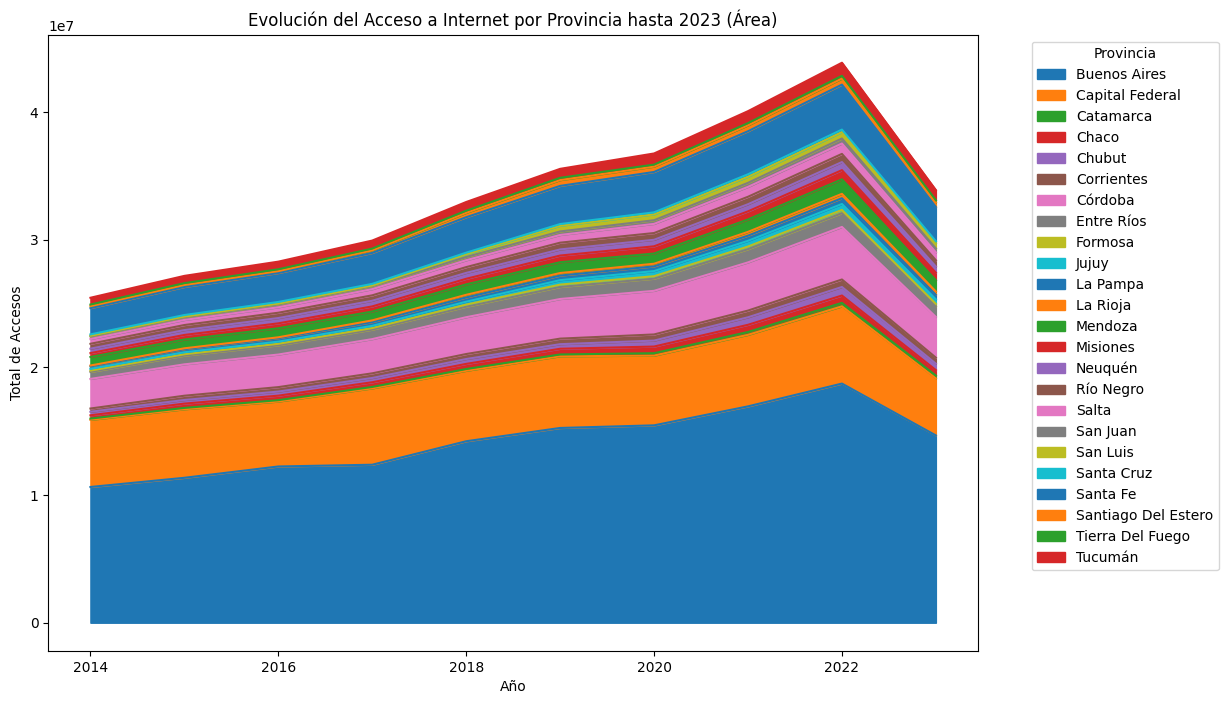

In [56]:
# Filtrar los datos para incluir solo hasta el año 2023
df_filtrado = df14[df14['Año'] <= 2023]

# Agrupar los datos filtrados por año y provincia, sumando los accesos totales
df_area = df_filtrado.groupby(['Año', 'Provincia'])['Total'].sum().unstack().fillna(0)

# Crear el gráfico de área para visualizar los datos
ax = df_area.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Evolución del Acceso a Internet por Provincia hasta 2023 (Área)')
plt.xlabel('Año')
plt.ylabel('Total de Accesos')

# Ajustar la leyenda fuera del gráfico en la parte superior derecha
ax.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Se observa una bajada en el total de accesos para todas las provincias, por ello se estudiará en particular el comportamiento de los datos a partir del 2022 y por trimestres

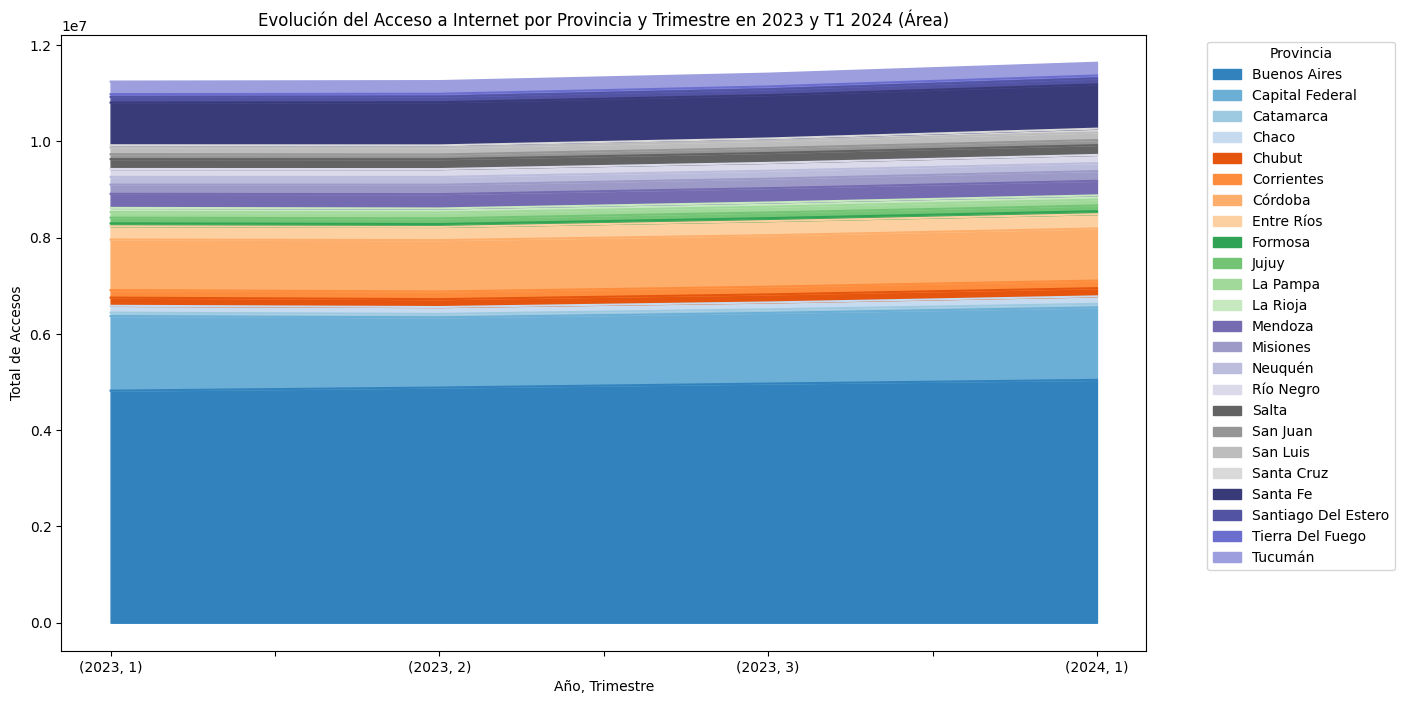

In [57]:
# Filtrar los datos para incluir solo desde el primer trimestre de 2023 hasta el primer trimestre de 2024
df_filtrado = df14[(df14['Año'] == 2023) | ((df14['Año'] == 2024) & (df14['Trimestre'] == 1))]

# Agrupar los datos filtrados por año, trimestre y provincia, sumando los accesos totales
df_area = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'])['Total'].sum().unstack().fillna(0)

# Generar una paleta de colores combinando 'tab20c' y 'tab20b' para obtener 24 colores
base_palette = sns.color_palette("tab20c", 20)
additional_colors = sns.color_palette("tab20b", 4)  # Añadir 4 colores más
full_palette = base_palette + additional_colors

# Crear el gráfico de área para visualizar los datos
ax = df_area.plot(kind='area', stacked=True, figsize=(14, 8), color=full_palette)
plt.title('Evolución del Acceso a Internet por Provincia y Trimestre en 2023 y T1 2024 (Área)')
plt.xlabel('Año, Trimestre')
plt.ylabel('Total de Accesos')

# Ajustar la leyenda fuera del gráfico en la parte superior derecha
ax.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

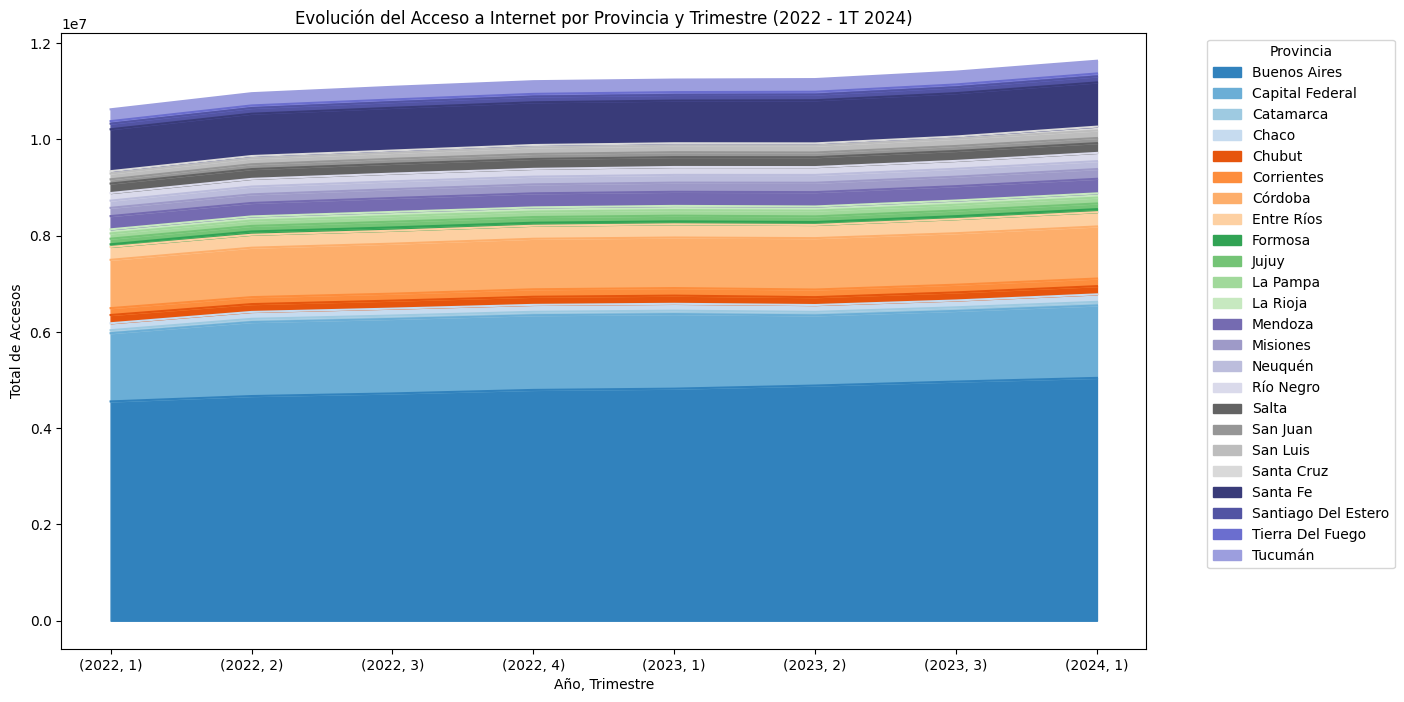

In [58]:
# Filtrar los datos para incluir solo los años 2022, 2023 y el primer trimestre de 2024
df_filtrado = df14[((df14['Año'] == 2022) | (df14['Año'] == 2023) | ((df14['Año'] == 2024) & (df14['Trimestre'] == 1)))]

# Agrupar los datos filtrados por año, trimestre y provincia, sumando los accesos totales
df_area = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'])['Total'].sum().unstack().fillna(0)

# Generar una paleta de colores combinando 'tab20c' y 'tab20b' para obtener 24 colores
base_palette = sns.color_palette("tab20c", 20)
additional_colors = sns.color_palette("tab20b", 4)  # Añadir 4 colores más
full_palette = base_palette + additional_colors

# Crear el gráfico de área para visualizar los datos
ax = df_area.plot(kind='area', stacked=True, figsize=(14, 8), color=full_palette)
plt.title('Evolución del Acceso a Internet por Provincia y Trimestre (2022 - 1T 2024)')
plt.xlabel('Año, Trimestre')
plt.ylabel('Total de Accesos')

# Ajustar la leyenda fuera del gráfico en la parte superior derecha
ax.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

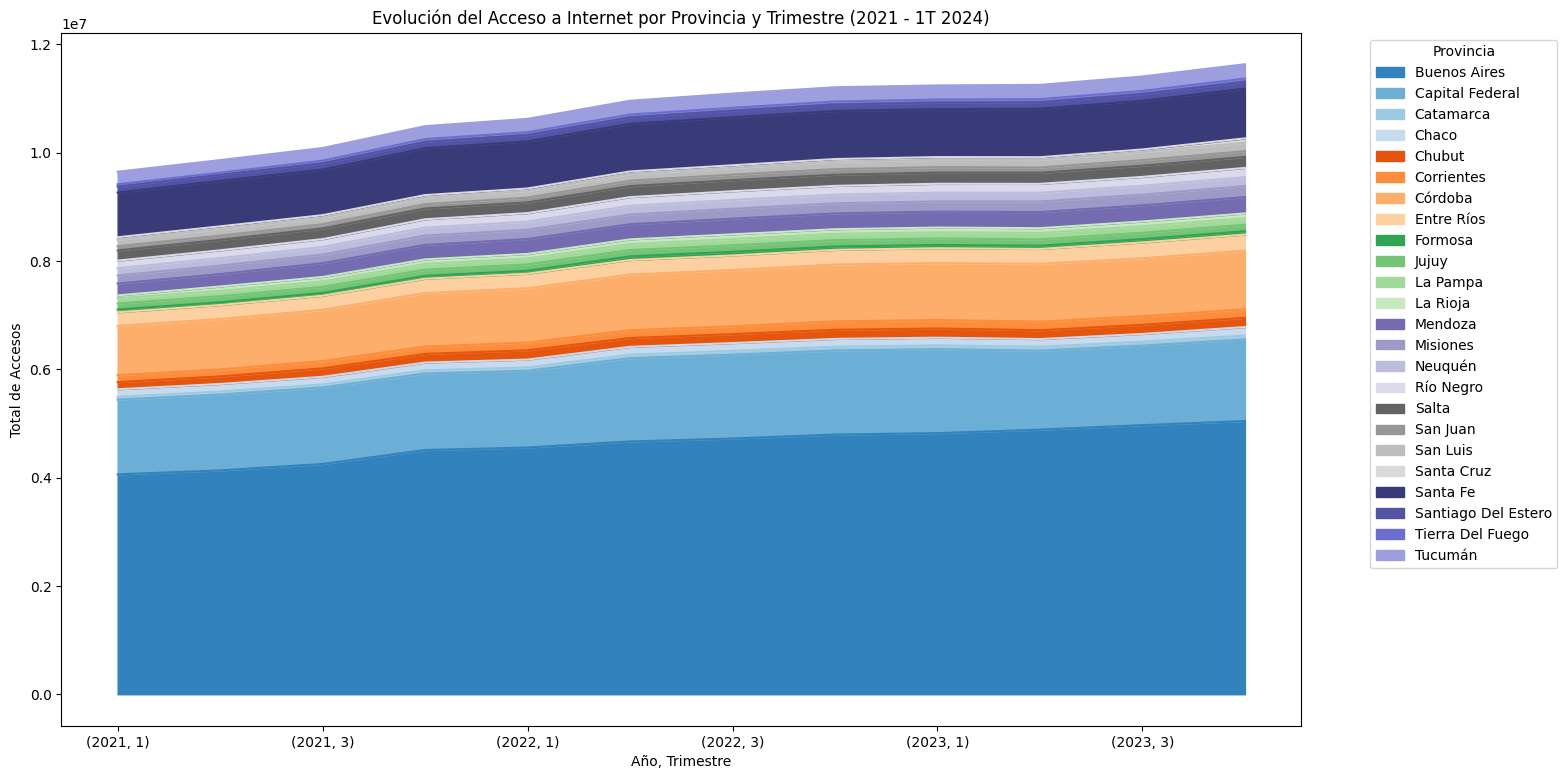

In [59]:
# Filtrar los datos para incluir desde el año 2021 hasta el primer trimestre de 2024
df_filtrado = df14[((df14['Año'] >= 2021) & (df14['Año'] < 2024)) | ((df14['Año'] == 2024) & (df14['Trimestre'] == 1))]

# Agrupar los datos filtrados por año, trimestre y provincia, sumando los accesos totales
df_area = df_filtrado.groupby(['Año', 'Trimestre', 'Provincia'])['Total'].sum().unstack().fillna(0)

# Generar una paleta de colores combinando 'tab20c' y 'tab20b' para obtener 24 colores
base_palette = sns.color_palette("tab20c", 20)
additional_colors = sns.color_palette("tab20b", 4)  # Añadir 4 colores más
full_palette = base_palette + additional_colors

# Crear el gráfico de área para visualizar los datos
ax = df_area.plot(kind='area', stacked=True, figsize=(16, 9), color=full_palette)
plt.title('Evolución del Acceso a Internet por Provincia y Trimestre (2021 - 1T 2024)')
plt.xlabel('Año, Trimestre')
plt.ylabel('Total de Accesos')

# Ajustar la leyenda fuera del gráfico en la parte superior derecha
ax.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

En el recuento de Totales por trimestre, los datos muestran una suba gradual. Es decir que es recomedable hacer comparaciones por trimestre.

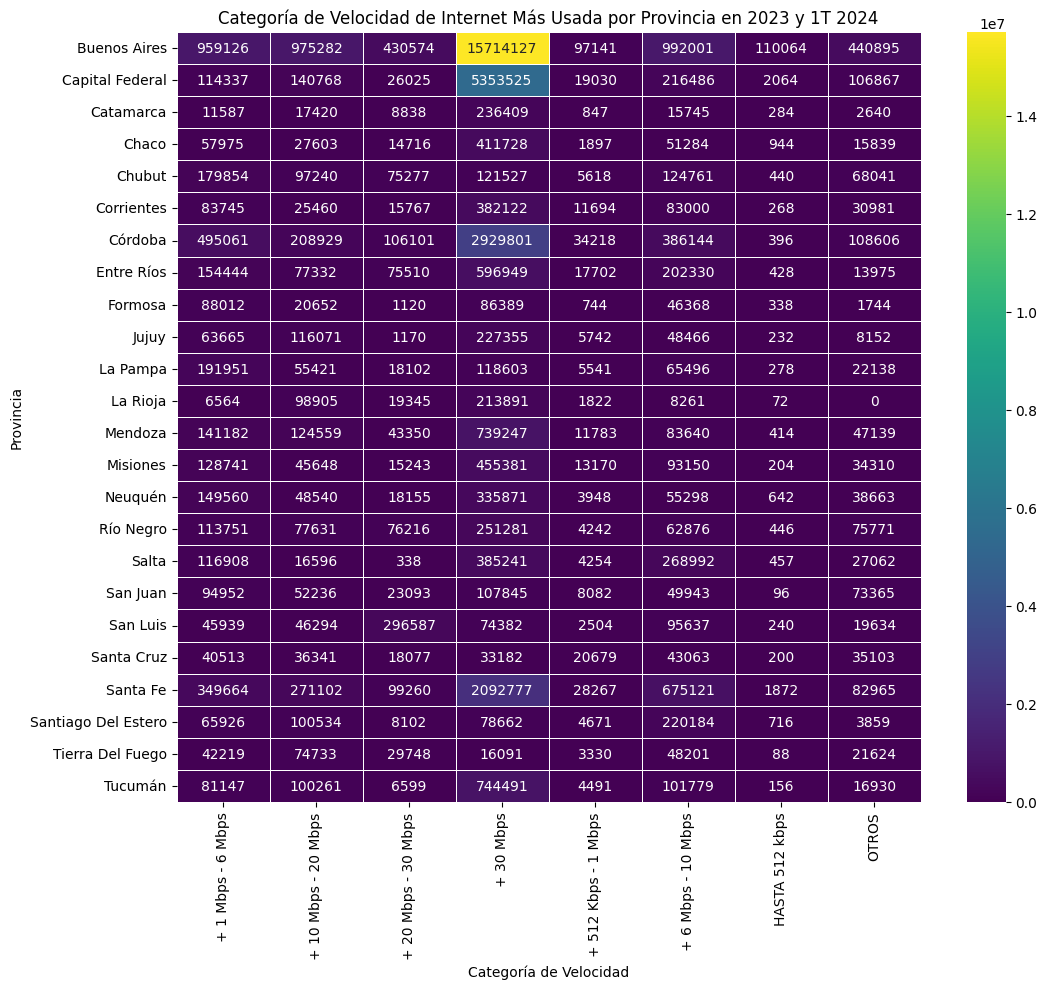

In [60]:
# Filtrar los datos para incluir solo los trimestres deseados del 2023 y el primer trimestre de 2024
df_filtrado = df14[((df14['Año'] == 2023) | ((df14['Año'] == 2024) & (df14['Trimestre'] == 1)))]

# Lista de categorías de velocidad correctas según los nombres de las columnas
categories = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
    '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS'
]

# Preparar los datos, sumar los accesos por categoría y provincia
df_filtrado = df_filtrado.melt(id_vars=['Año', 'Trimestre', 'Provincia'], value_vars=categories,
                               var_name='Categoría', value_name='Accesos')

# Agrupar los datos por provincia y categoría para obtener la suma total de accesos
df_agrupado = df_filtrado.groupby(['Provincia', 'Categoría'])['Accesos'].sum().reset_index()

# Crear un pivot table para el heatmap correctamente
pivot_table = df_agrupado.pivot(index='Provincia', columns='Categoría', values='Accesos')

# Crear un heatmap para visualizar los datos
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", linewidths=.5, cmap='viridis')
plt.title('Categoría de Velocidad de Internet Más Usada por Provincia en 2023 y 1T 2024')
plt.xlabel('Categoría de Velocidad')
plt.ylabel('Provincia')
plt.show()

###**Observaciones clave del Heatmap**

* Provincias con Altos Niveles de Accesos:

1. Buenos Aires muestra un valor extremadamente alto en la categoría + 30 Mbps, con 15,714,127 accesos, significativamente mayor que cualquier otra categoría en cualquier otra provincia.
2. Capital Federal también tiene altos valores en + 30 Mbps (5,353,525 accesos).

* Distribución por Categoría:

1. La mayoría de las provincias tienen sus mayores valores en categorías superiores de velocidad (por ejemplo, + 30 Mbps).
2. Algunas provincias como Catamarca y La Rioja tienen valores relativamente altos en categorías de velocidad media (+ 1 Mbps - 6 Mbps y + 6 Mbps - 10 Mbps).

* Comparación entre Provincias:

1. Las provincias con menor número de accesos en todas las categorías incluyen Formosa, Jujuy, y La Rioja.
2. Provincias con una distribución más equilibrada entre varias categorías incluyen Córdoba y Mendoza.

* Tendencia hacia Mayores Velocidades:

 Hay una tendencia general hacia mayores velocidades de internet (+ 30 Mbps), especialmente en las provincias más grandes y urbanizadas como Buenos Aires y Capital Federal.

* Desigualdad Regional:

 Existe una desigualdad notable en la penetración de altas velocidades de internet, con algunas provincias mostrando concentraciones altas en categorías de velocidad baja y media.

###Recomendaciones
* Políticas de Infraestructura:
Las provincias con menores accesos en categorías de alta velocidad pueden beneficiarse de políticas y programas enfocados en mejorar la infraestructura de internet.



---





Para un análisis más detallado, se desglosarán los datos por trimestres individuales dentro de los años 2023 y 2024 para identificar tendencias estacionales o cambios específicos en cada trimestre.


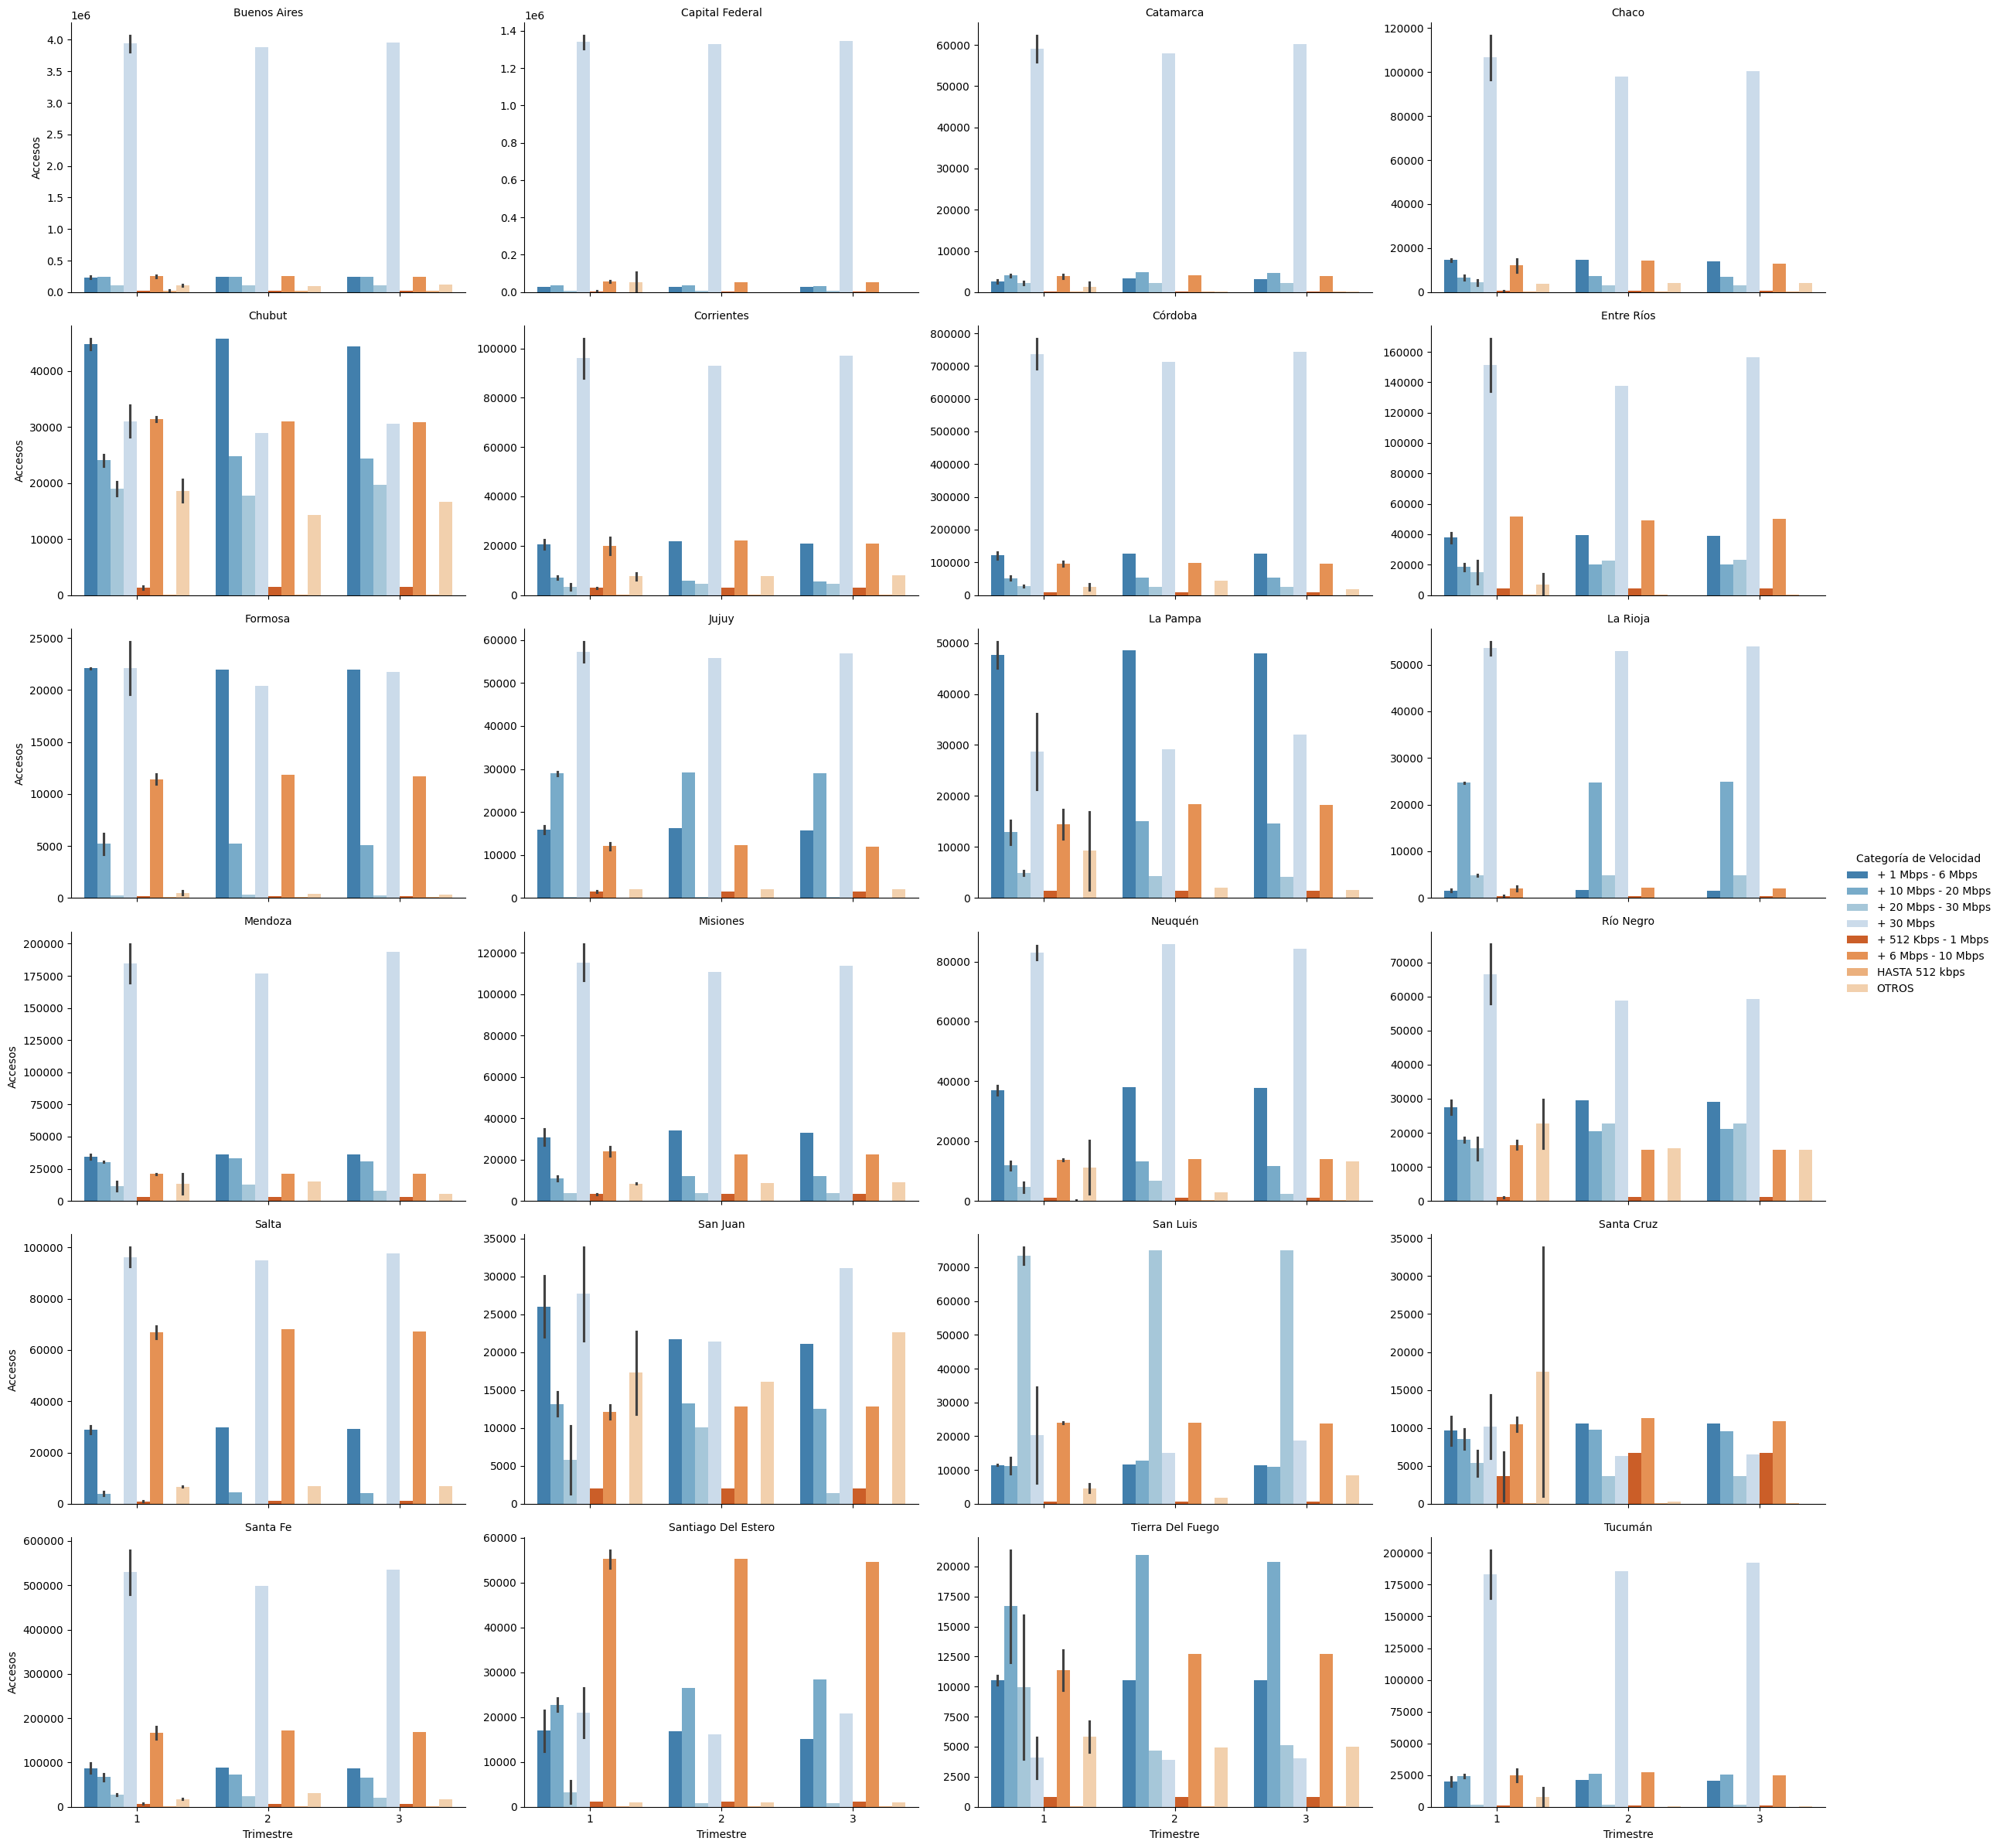

In [61]:
# Filtrar los datos para incluir solo los trimestres deseados del 2023 y el primer trimestre de 2024
df_filtrado = df14[((df14['Año'] == 2023) | ((df14['Año'] == 2024) & (df14['Trimestre'] == 1)))]

# Lista de categorías de velocidad correctas según los nombres de las columnas
categories = [
    'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
    '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS'
]

# Preparar los datos, sumar los accesos por categoría, provincia, año y trimestre
df_melted = df_filtrado.melt(id_vars=['Año', 'Trimestre', 'Provincia'], value_vars=categories,
                             var_name='Categoría', value_name='Accesos')

# Agrupar los datos por provincia, año, trimestre y categoría para obtener la suma total de accesos
df_agrupado = df_melted.groupby(['Provincia', 'Año', 'Trimestre', 'Categoría'])['Accesos'].sum().reset_index()

# Crear gráficos de barras apiladas por trimestre para cada provincia
g = sns.FacetGrid(df_agrupado, col="Provincia", col_wrap=4, height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.barplot, x='Trimestre', y='Accesos', hue='Categoría', palette='tab20c')

# Ajustar los títulos y etiquetas
g.set_axis_labels("Trimestre", "Accesos")
g.set_titles(col_template="{col_name}")
g.add_legend(title="Categoría de Velocidad")

# Mostrar el gráfico
plt.show()

##Análisis por Provincia
* 1) Buenos Aires

 * Tendencia Principal: La categoría + 30 Mbps es dominante en todos los trimestres, reflejando una infraestructura avanzada y una alta adopción de velocidades de internet rápidas.

 * Fluctuaciones Trimestrales: Aunque hay una cantidad significativa de accesos en cada trimestre, el cuarto trimestre de 2023 muestra un notable aumento, posiblemente debido a mejoras de infraestructura o promociones de proveedores de servicios.

 * Recomendación: Mantener e incrementar las inversiones en infraestructura para seguir liderando en adopción de alta velocidad.

* 1) Capital Federal

 * Tendencia Principal: Similar a Buenos Aires, + 30 Mbps es la categoría más utilizada, indicando una alta disponibilidad y preferencia por velocidades rápidas.

 * Fluctuaciones Trimestrales: Hay una estabilidad relativa con un ligero aumento en el primer trimestre de 2024, lo cual podría indicar la aceptación de nuevos usuarios.

 * Recomendación: Continuar con las políticas de mejora de infraestructura para satisfacer la creciente demanda.
* 3) Córdoba

 . Tendencia Principal: La categoría + 30 Mbps y + 10 Mbps - 20 Mbps son las más comunes, indicando una distribución más equilibrada de la infraestructura.

 . Fluctuaciones Trimestrales: Se observa un aumento constante en el uso de + 30 Mbps, especialmente en el cuarto trimestre de 2023.

 . Recomendación: Fomentar la transición hacia velocidades más altas mediante incentivos y mejoras en la infraestructura.

* 4) Chubut

 * Tendencia Principal: Hay una notable presencia de la categoría + 1 Mbps - 6 Mbps, lo que sugiere una infraestructura de internet en desarrollo.

 * Fluctuaciones Trimestrales: Los accesos en + 30 Mbps aumentan significativamente en el cuarto trimestre de 2023.

 * Recomendación: Aumentar la inversión en infraestructuras para mejorar la velocidad y capacidad de la red.

* 5) Formosa

 * Tendencia Principal: Predominan las categorías de menor velocidad, + 1 Mbps - 6 Mbps y + 6 Mbps - 10 Mbps, lo que indica una menor penetración de alta velocidad.

 * Fluctuaciones Trimestrales: Estabilidad en el uso de las categorías más bajas, sin grandes incrementos en velocidades más altas.

 * Recomendación: Desarrollar programas para mejorar la infraestructura y fomentar la adopción de servicios de internet de alta velocidad.

* 6) Mendoza

 * Tendencia Principal: + 30 Mbps muestra una fuerte presencia, junto con + 10 Mbps - 20 Mbps.

 * Fluctuaciones Trimestrales: Incrementos significativos en el uso de + 30 Mbps en los trimestres finales de 2023.

 * Recomendación: Continuar desarrollando la infraestructura de alta velocidad y promover la adopción mediante tarifas competitivas y mejores servicios.

* 7) Tucumán

 * Tendencia Principal: Predominan las categorías + 30 Mbps y + 10 Mbps - 20 Mbps.

  * Fluctuaciones Trimestrales: Incrementos constantes en todas las categorías, con una notable presencia de velocidades más altas.

 * Recomendación: Seguir mejorando la infraestructura y proporcionando incentivos para la adopción de servicios de alta velocidad.

* 8) Catamarca

 * Tendencia Principal: Las categorías de menor velocidad, como + 1 Mbps - 6 Mbps y + 6 Mbps - 10 Mbps, son las más comunes, indicando una infraestructura de internet menos desarrollada.

 * Fluctuaciones Trimestrales: Estabilidad con incrementos moderados en las categorías + 1 Mbps - 6 Mbps y + 6 Mbps - 10 Mbps.

 * Recomendación: Incrementar las inversiones en infraestructura para mejorar la disponibilidad de velocidades más altas.

* 9) Chaco

 * Tendencia Principal: Predominan las categorías + 1 Mbps - 6 Mbps y + 6 Mbps - 10 Mbps, lo que sugiere una infraestructura en desarrollo.

 * Fluctuaciones Trimestrales: Incrementos moderados en todas las categorías, con un ligero aumento en + 30 Mbps en los trimestres finales de 2023.

 * Recomendación: Continuar mejorando la infraestructura para fomentar la adopción de velocidades más altas.

* 10) Corrientes

 * Tendencia Principal: Una distribución relativamente equilibrada entre varias categorías de velocidad, con + 1 Mbps - 6 Mbps siendo prominente.

 * Fluctuaciones Trimestrales: Aumento constante en el uso de velocidades intermedias y altas.

 * Recomendación: Mejorar la infraestructura para facilitar la transición hacia velocidades más altas.

* 11) Entre Ríos

 * Tendencia Principal: Las categorías + 10 Mbps - 20 Mbps y + 30 Mbps muestran una fuerte presencia.

 * Fluctuaciones Trimestrales: Incrementos significativos en las categorías de mayor velocidad hacia el final de 2023.

 * Recomendación: Mantener el enfoque en la mejora de la infraestructura para soportar la creciente demanda de alta velocidad.

* 12) Jujuy

 * Tendencia Principal: Las categorías de menor velocidad, especialmente + 1 Mbps - 6 Mbps, son las más comunes.

 * Fluctuaciones Trimestrales: Incrementos moderados en todas las categorías, con una leve mejora en + 10 Mbps - 20 Mbps.

 * Recomendación: Fomentar inversiones en infraestructura de alta velocidad para mejorar la disponibilidad y adopción.

* 13) La Pampa

 * Tendencia Principal: Una presencia notable de + 10 Mbps - 20 Mbps y + 30 Mbps, aunque en menor cantidad comparada con provincias más desarrolladas.

 * Fluctuaciones Trimestrales: Incrementos moderados en todas las categorías, con una tendencia a la mejora en velocidades más altas.

 * Recomendación: Continuar mejorando la infraestructura y promover tarifas competitivas para aumentar la adopción.

* 14) La Rioja

 * Tendencia Principal: Predominan las categorías de menor velocidad, con una notable presencia de + 1 Mbps - 6 Mbps.

 * Fluctuaciones Trimestrales: Estabilidad en las categorías de velocidad más bajas, con incrementos moderados.

 * Recomendación: Invertir en la infraestructura de alta velocidad y promover servicios de internet más rápidos.

* 15) Misiones

 * Tendencia Principal: Las categorías + 10 Mbps - 20 Mbps y + 30 Mbps son dominantes, indicando una infraestructura mejorada.

 * Fluctuaciones Trimestrales: Incrementos en todas las categorías, con un notable aumento en + 30 Mbps hacia finales de 2023.

 * Recomendación: Mantener el enfoque en mejorar la infraestructura y fomentar la adopción de servicios de alta velocidad.

* 16) Neuquén

 * Tendencia Principal: Una fuerte presencia de + 30 Mbps, junto con + 10 Mbps - 20 Mbps.

 * Fluctuaciones Trimestrales: Incrementos significativos en el uso de + 30 Mbps en todos los trimestres.

 * Recomendación: Continuar desarrollando la infraestructura y promoviendo la adopción de servicios de alta velocidad.

* 17) Río Negro


 * Tendencia Principal: Predominan + 10 Mbps - 20 Mbps y + 30 Mbps.

 * Fluctuaciones Trimestrales: Incrementos constantes en todas las categorías, con un énfasis en velocidades más altas.

 * Recomendación: Seguir mejorando la infraestructura y proporcionando incentivos para la adopción de servicios de alta velocidad.

* 18) Salta

 * Tendencia Principal: Las categorías de menor velocidad como + 1 Mbps - 6 Mbps son comunes, con una notable presencia de + 6 Mbps - 10 Mbps.

 * Fluctuaciones Trimestrales: Incrementos moderados en todas las categorías, con un ligero aumento en las velocidades más altas.

 * Recomendación: Fomentar la mejora de la infraestructura y promover la adopción de velocidades más altas.

* 19) San Juan

 * Tendencia Principal: Predominan + 1 Mbps - 6 Mbps y + 6 Mbps - 10 Mbps, con un aumento gradual en + 30 Mbps.

 * Fluctuaciones Trimestrales: Incrementos constantes en todas las categorías, con un notable aumento en las velocidades más altas hacia el final de 2023.

 * Recomendación: Continuar desarrollando la infraestructura y promoviendo la adopción de servicios de alta velocidad.

* 20)San Luis

 * Tendencia Principal: Las categorías de menor velocidad, especialmente + 1 Mbps - 6 Mbps y + 6 Mbps - 10 Mbps, son las más comunes.

 * Fluctuaciones Trimestrales: Incrementos moderados en todas las categorías, con un ligero aumento en + 30 Mbps.

 * Recomendación: Fomentar inversiones en infraestructura de alta velocidad para mejorar la disponibilidad y adopción.

* 21)Santa Cruz

 * Tendencia Principal: Una presencia notable de + 10 Mbps - 20 Mbps y + 30 Mbps.

 * Fluctuaciones Trimestrales: Incrementos significativos en el uso de + 30 Mbps en todos los trimestres.

 * Recomendación: Continuar mejorando la infraestructura y fomentando la adopción de servicios de alta velocidad.

* 22)Santa Fe

 * Tendencia Principal: Las categorías + 30 Mbps y + 10 Mbps - 20 Mbps son dominantes.

 * Fluctuaciones Trimestrales: Incrementos constantes en todas las categorías, con una notable presencia de velocidades más altas.

 * Recomendación: Mantener el enfoque en mejorar la infraestructura y fomentar la adopción de servicios de alta velocidad.

* 23)Santiago del Estero

 * Tendencia Principal: Las categorías de menor velocidad, especialmente + 1 Mbps - 6 Mbps, son las más comunes.

 * Fluctuaciones Trimestrales: Incrementos moderados en todas las categorías, con un ligero aumento en + 30 Mbps.

 * Recomendación: Invertir en la infraestructura de alta velocidad y promover servicios de internet más rápidos.

* 24) Tierra del Fuego

 * Tendencia Principal: Una fuerte presencia de + 30 Mbps, junto con + 10 Mbps - 20 Mbps.

 * Fluctuaciones Trimestrales: Incrementos significativos en el uso de + 30 Mbps en todos los trimestres.

 * Recomendación: Continuar desarrollando la infraestructura y promoviendo la adopción de servicios de alta velocidad.



---



---





#**Cálculo de KPI 3**
Aumentar en un 10% las conexiones mayores a 20 Mbps para las provincias que tienen baja velocidad de conexión

In [62]:
# Paso 1: Filtrar los datos para el trimestre 1 del año 2024
df_2024_Q1 = df14[(df14['Año'] == 2024) & (df14['Trimestre'] == 1)].copy()

# Paso 2: Identificar las provincias con baja velocidad de conexión (menor a 20 Mbps)
df_2024_Q1.loc[:, 'Velocidad_promedio'] = (df_2024_Q1['HASTA 512 kbps'] * 0.512 +
                                           df_2024_Q1['+ 512 Kbps - 1 Mbps'] * 1 +
                                           df_2024_Q1['+ 1 Mbps - 6 Mbps'] * 6 +
                                           df_2024_Q1['+ 6 Mbps - 10 Mbps'] * 10 +
                                           df_2024_Q1['+ 10 Mbps - 20 Mbps'] * 20 +
                                           df_2024_Q1['+ 20 Mbps - 30 Mbps'] * 30 +
                                           df_2024_Q1['+ 30 Mbps'] * 30) / df_2024_Q1['Total']

provincias_baja_velocidad = df_2024_Q1[df_2024_Q1['Velocidad_promedio'] < 20].copy()

# Paso 3: Calcular el nuevo acceso aumentando en un 10% las conexiones mayores a 20 Mbps
provincias_baja_velocidad.loc[:, 'Acceso_mayor_20_Mbps'] = provincias_baja_velocidad['+ 20 Mbps - 30 Mbps'] + provincias_baja_velocidad['+ 30 Mbps']
provincias_baja_velocidad.loc[:, 'Nuevo_acceso'] = provincias_baja_velocidad['Acceso_mayor_20_Mbps'] * 1.1

# Paso 4: Calcular el KPI
provincias_baja_velocidad.loc[:, 'KPI_Aumento_Acceso'] = ((provincias_baja_velocidad['Nuevo_acceso'] - provincias_baja_velocidad['Acceso_mayor_20_Mbps']) / provincias_baja_velocidad['Acceso_mayor_20_Mbps']) * 100


In [63]:
# Mostrar el DataFrame con el KPI calculado
provincias_baja_velocidad[['Provincia', 'Acceso_mayor_20_Mbps', 'Nuevo_acceso', 'KPI_Aumento_Acceso']]

Provincia  Acceso_mayor_20_Mbps  Nuevo_acceso  \
4                Chubut               54105.0       59515.5   
8               Formosa               24940.0       27434.0   
10             La Pampa               41523.0       45675.3   
14              Neuquén               83590.0       91949.0   
16                Salta              100101.0      110111.1   
17             San Juan               35194.0       38713.4   
19           Santa Cruz               21405.0       23545.5   
21  Santiago Del Estero               32211.0       35432.1   
22     Tierra Del Fuego               21696.0       23865.6   

    KPI_Aumento_Acceso  
4                 10.0  
8                 10.0  
10                10.0  
14                10.0  
16                10.0  
17                10.0  
19                10.0  
21                10.0  
22                10.0

##Hoja Nro 15: 'Ingresos'
 Ingresos generados por los servicios de internet en miles de pesos.


In [64]:
nombre_hoja = 'Ingresos '

#Cargar la hoja en un DataFrame
df15 = cargar_hoja_excel(ruta_archivo, nombre_hoja)

In [65]:
#Mostrar cantidad de filas y columnas
df15.shape

(41, 4)

In [66]:
#Inspeccionar el df15 en forma rápida
df15.head()

Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          1               2.804191e+08   Ene-Mar 2024
1  2023          4               1.673760e+08   Oct-Dic 2023
2  2023          3               1.331066e+08  Jul-Sept 2023
3  2023          2               1.180603e+08   Jun-Mar 2023
4  2033          1               1.041350e+08   Ene-Mar 2023

In [67]:
#Mostrar información del tipo de dato
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [68]:
# Mostrar los valores duplicados
duplicados = df15.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

Número de filas duplicadas: 0


In [69]:
# Corregir el año incorrecto
df15['Año'] = df15['Año'].replace(2033, 2023)

In [70]:
# Definir una función para mapear trimestres a meses
def trimestre_a_mes(trimestre):
    if trimestre == 1:
        return '01'
    elif trimestre == 2:
        return '04'
    elif trimestre == 3:
        return '07'
    elif trimestre == 4:
        return '10'
    else:
        return '01'  # Valor por defecto en caso de datos erróneos

# Crear la columna 'Fecha'
df15['Fecha'] = pd.to_datetime(df15['Año'].astype(str) + '-' + df15['Trimestre'].apply(trimestre_a_mes) + '-01')

# Mostrar el DataFrame resultante
print(df15)

     Año  Trimestre  Ingresos (miles de pesos)        Periodo      Fecha
0   2024          1               2.804191e+08   Ene-Mar 2024 2024-01-01
1   2023          4               1.673760e+08   Oct-Dic 2023 2023-10-01
2   2023          3               1.331066e+08  Jul-Sept 2023 2023-07-01
3   2023          2               1.180603e+08   Jun-Mar 2023 2023-04-01
4   2023          1               1.041350e+08   Ene-Mar 2023 2023-01-01
5   2022          4               7.244348e+07   Oct-Dic 2022 2022-10-01
6   2022          3               6.408678e+07  Jul-Sept 2022 2022-07-01
7   2022          2               6.041950e+07   Abr-Jun 2022 2022-04-01
8   2022          1               5.521931e+07   Ene-Mar 2022 2022-01-01
9   2021          4               4.546789e+07   Oct-Dic 2021 2021-10-01
10  2021          3               4.299994e+07  Jul-Sept 2021 2021-07-01
11  2021          2               3.823967e+07   Abr-Jun 2021 2021-04-01
12  2021          1               3.667637e+07   En

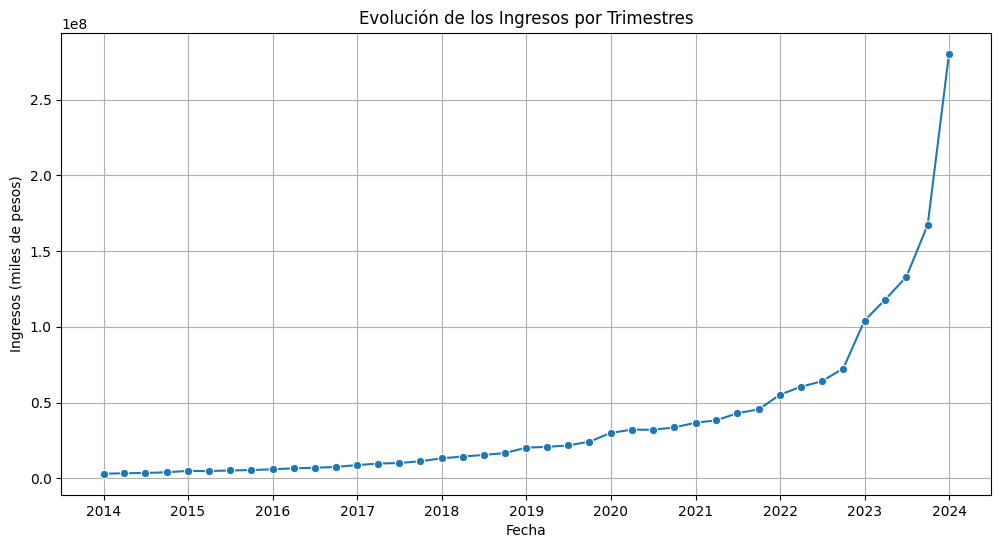

In [71]:
# Ordenar el DataFrame por fecha
df15 = df15.sort_values(by='Fecha')

# Crear el gráfico de líneas para mostrar la evolución de los ingresos por trimestres
plt.figure(figsize=(12, 6))
sns.lineplot(data=df15, x='Fecha', y='Ingresos (miles de pesos)', marker='o')

# Configurar el título y las etiquetas del gráfico
plt.title('Evolución de los Ingresos por Trimestres')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)

# Mostrar el gráfico
plt.show()

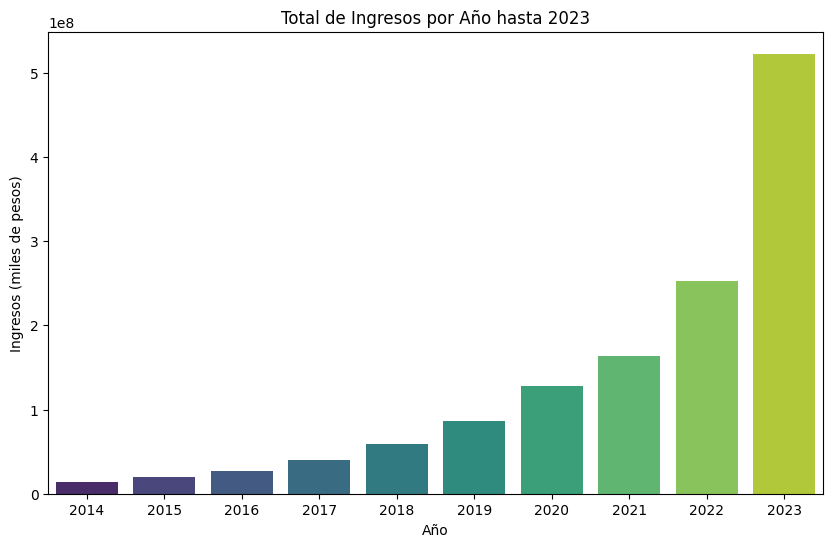

In [72]:
# Agrupar los datos por año y sumar los ingresos
df_agrupado = df15[df15['Año'] <= 2023].groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

# Crear el gráfico de barras para mostrar los ingresos totales por año
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agrupado, x='Año', y='Ingresos (miles de pesos)', palette='viridis')

# Configurar el título y las etiquetas del gráfico
plt.title('Total de Ingresos por Año hasta 2023')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(axis='y')

# Quitar las líneas horizontales dentro del gráfico
plt.grid(False)

# Mostrar el gráfico
plt.show()

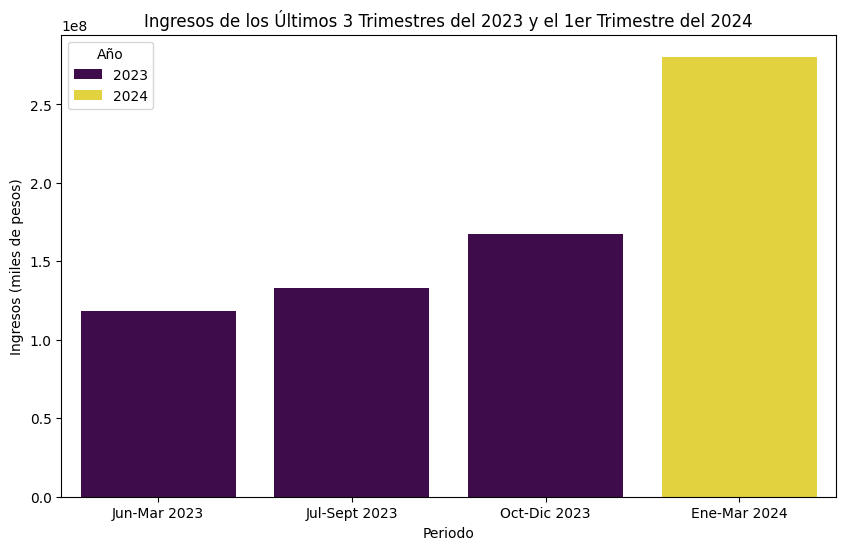

In [73]:
# Filtrar los datos para incluir solo los últimos 3 trimestres de 2023 y el primer trimestre de 2024
df_filtrado = df15[((df15['Año'] == 2023) & (df15['Trimestre'] >= 2)) | ((df15['Año'] == 2024) & (df15['Trimestre'] == 1))]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras apiladas
sns.barplot(data=df_filtrado, x='Periodo', y='Ingresos (miles de pesos)', hue='Año', dodge=False, palette='viridis')

# Configurar el título y las etiquetas del gráfico
plt.title('Ingresos de los Últimos 3 Trimestres del 2023 y el 1er Trimestre del 2024')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.legend(title='Año')
plt.grid(axis='y')

# Quitar las líneas horizontales dentro del gráfico
plt.grid(False)

# Mostrar el gráfico
plt.show()

###Conclusiones:
Se observa una tendencia clara de crecimiento constante y significativo a lo largo del período analizado. Inicialmente, los ingresos se mantuvieron relativamente estables con un crecimiento lento hasta aproximadamente el año 2020. A partir de 2021, se evidencia una aceleración en el crecimiento, que se vuelve exponencial a partir de 2022. Este incremento drástico en los ingresos puede atribuirse a diversos factores como la expansión de la infraestructura de telecomunicaciones, el aumento en la adopción de servicios de internet de alta velocidad, y posiblemente, la implementación de nuevas tecnologías.

##Se procederá al análisis del archivo excel "mapa_conectividad.xlsx"
Datos correspondientes al trimestre Enero-Marzo del año 2024

In [74]:
#Descarga del archivo
!gdown https://docs.google.com/spreadsheets/d/16_YxCrNreJGb7W1uMi3hs61lpU59sL5v/edit?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=16_YxCrNreJGb7W1uMi3hs61lpU59sL5v
To: /content/mapa_conectividad.xlsx
100% 497k/497k [00:00<00:00, 78.6MB/s]


In [75]:
# Ruta al archivo Excel
archivo_excel = '/content/mapa_conectividad.xlsx'

# Leer la hoja de cálculo en un DataFrame
df_mapa = pd.read_excel(archivo_excel)

In [76]:
#Inspeccionar el df_mapa en forma rápida
df_mapa.head()

Provincia     Partido          Localidad  Población ADSL Cablemódem  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo      23408   SI         SI   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi        280   --         --   
2  BUENOS AIRES  25 de Mayo          Del Valle        899   SI         --   
3  BUENOS AIRES  25 de Mayo          Ernestina        145   SI         --   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte        547   --         --   

  Dial Up Fibra óptica Satelital Wireless Telefonía Fija  3G  4G       Link  \
0      --           --        SI       SI             SI  SI  SI  6854100.0   
1      --           --        --       --             SI  --  --  6854010.0   
2      --           --        SI       --             --  SI  --  6854020.0   
3      --           --        --       --             SI  --  --  6854030.0   
4      --           --        --       SI             --  --  --  6854040.0   

     Latitud   Longitud  
0 -35.433939 -60.173121  
1 -35.739217 -60.559063  
2 -35.897345 -60.731609  
3 -35.270234 -59.557503  
4 -35.164397 -60.081358

In [77]:
#Mostrar cantidad de filas y columnas del df_mapa
df_mapa.shape

(4305, 16)

In [78]:
#Mostrar información del df_mapa
df_mapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4305 non-null   object 
 1   Partido         4305 non-null   object 
 2   Localidad       4305 non-null   object 
 3   Población       4305 non-null   int64  
 4   ADSL            4305 non-null   object 
 5   Cablemódem      4305 non-null   object 
 6   Dial Up         4305 non-null   object 
 7   Fibra óptica    4305 non-null   object 
 8   Satelital       4305 non-null   object 
 9   Wireless        4305 non-null   object 
 10  Telefonía Fija  4305 non-null   object 
 11  3G              4305 non-null   object 
 12  4G              4305 non-null   object 
 13  Link            4293 non-null   float64
 14  Latitud         4305 non-null   float64
 15  Longitud        4305 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 538.2+ KB


In [79]:
#Descripción estadística de las columnas numéricas
print(df_mapa.describe())

          Población          Link      Latitud     Longitud
count  4.305000e+03  4.293000e+03  4305.000000  4305.000000
mean   8.707207e+03  3.908916e+07   -32.263116   -63.039292
std    3.824490e+04  2.939911e+07     5.001839     3.829679
min    0.000000e+00  2.000010e+06   -77.874009   -72.891627
25%    1.170000e+02  1.009104e+07   -34.708542   -65.686443
50%    5.790000e+02  3.400705e+07   -32.286202   -63.450636
75%    3.217000e+03  6.612603e+07   -28.583403   -60.009923
max    1.317298e+06  9.401402e+07   -21.817293   -34.626560


In [80]:
# Mostrar los valores únicos en la columna 'Provincia'
print(df_mapa['Provincia'].unique())

['BUENOS AIRES' 'RIO NEGRO' 'CABA' 'CATAMARCA' 'ENTRE RIOS' 'MENDOZA'
 'SAN JUAN' 'SALTA' 'SANTA FE' 'CHACO' 'TUCUMAN' 'SAN LUIS' 'CORDOBA'
 'MISIONES' 'CHUBUT' 'FORMOSA' 'JUJUY' 'NEUQUEN' 'LA PAMPA'
 'SANTIAGO DEL ESTERO' 'SANTA CRUZ' 'LA RIOJA' 'TIERRA DEL FUEGO'
 'CORRIENTES']


In [81]:
import pandas as pd

# Diccionario de mapeo de nombres de provincias
mapeo_provincias = {
    'BUENOS AIRES': 'Buenos Aires',
    'CABA': 'Capital Federal',
    'CATAMARCA': 'Catamarca',
    'CHACO': 'Chaco',
    'CHUBUT': 'Chubut',
    'CORDOBA': 'Córdoba',
    'CORRIENTES': 'Corrientes',
    'ENTRE RIOS': 'Entre Ríos',
    'FORMOSA': 'Formosa',
    'JUJUY': 'Jujuy',
    'LA PAMPA': 'La Pampa',
    'LA RIOJA': 'La Rioja',
    'MENDOZA': 'Mendoza',
    'MISIONES': 'Misiones',
    'NEUQUEN': 'Neuquén',
    'RIO NEGRO': 'Río Negro',
    'SALTA': 'Salta',
    'SAN JUAN': 'San Juan',
    'SAN LUIS': 'San Luis',
    'SANTA CRUZ': 'Santa Cruz',
    'SANTA FE': 'Santa Fe',
    'SANTIAGO DEL ESTERO': 'Santiago Del Estero',
    'TIERRA DEL FUEGO': 'Tierra Del Fuego',
    'TUCUMAN': 'Tucumán'
}

# Asegurarse de que los nombres de las provincias están en mayúsculas en el DataFrame
df_mapa['Provincia'] = df_mapa['Provincia'].str.upper()

# Renombrar las provincias en el DataFrame
df_mapa['Provincia'] = df_mapa['Provincia'].replace(mapeo_provincias)

# Verificar los cambios
print(df_mapa['Provincia'].unique())


['Buenos Aires' 'Río Negro' 'Capital Federal' 'Catamarca' 'Entre Ríos'
 'Mendoza' 'San Juan' 'Salta' 'Santa Fe' 'Chaco' 'Tucumán' 'San Luis'
 'Córdoba' 'Misiones' 'Chubut' 'Formosa' 'Jujuy' 'Neuquén' 'La Pampa'
 'Santiago Del Estero' 'Santa Cruz' 'La Rioja' 'Tierra Del Fuego'
 'Corrientes']


In [82]:
import folium

# Crear un mapa centrado en Argentina
mapa = folium.Map(location=[-38.416097, -63.616672], zoom_start=5)

# Agregar marcadores para cada localidad
for idx, row in df_mapa.iterrows():
    popup_text = f"{row['Localidad']}<br>ADSL: {row['ADSL']}<br>Cablemódem: {row['Cablemódem']}<br>Fibra óptica: {row['Fibra óptica']}<br>Satelital: {row['Satelital']}<br>Wireless: {row['Wireless']}<br>3G: {row['3G']}<br>4G: {row['4G']}"
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=popup_text,
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('mapa_conexiones_internet.html')

In [83]:
mapa

In [84]:
df_mapa.head()

Provincia     Partido          Localidad  Población ADSL Cablemódem  \
0  Buenos Aires  25 de Mayo         25 de Mayo      23408   SI         SI   
1  Buenos Aires  25 de Mayo    Agustín Mosconi        280   --         --   
2  Buenos Aires  25 de Mayo          Del Valle        899   SI         --   
3  Buenos Aires  25 de Mayo          Ernestina        145   SI         --   
4  Buenos Aires  25 de Mayo  Gobernador Ugarte        547   --         --   

  Dial Up Fibra óptica Satelital Wireless Telefonía Fija  3G  4G       Link  \
0      --           --        SI       SI             SI  SI  SI  6854100.0   
1      --           --        --       --             SI  --  --  6854010.0   
2      --           --        SI       --             --  SI  --  6854020.0   
3      --           --        --       --             SI  --  --  6854030.0   
4      --           --        --       SI             --  --  --  6854040.0   

     Latitud   Longitud  
0 -35.433939 -60.173121  
1 -35.739217 -60.559063  
2 -35.897345 -60.731609  
3 -35.270234 -59.557503  
4 -35.164397 -60.081358

###Cálculo de KPI 2

In [85]:
# Paso 1: Calcular el acceso actual a fibra óptica por provincia
df_fibra = df_mapa[df_mapa['Fibra óptica'] == 'SI'].groupby('Provincia').size().reset_index(name='Acceso_actual')

# Paso 2: Identificar las provincias con menos acceso (por ejemplo, menos del 50% de localidades con fibra óptica)
threshold = df_fibra['Acceso_actual'].quantile(0.5)  # Usar la mediana como umbral
provincias_menos_acceso = df_fibra[df_fibra['Acceso_actual'] <= threshold]['Provincia']

# Paso 3: Calcular el nuevo acceso aumentando en un 4% para esas provincias
df_fibra['Nuevo_acceso'] = df_fibra.apply(
    lambda row: row['Acceso_actual'] * 1.04 if row['Provincia'] in provincias_menos_acceso.values else row['Acceso_actual'],
    axis=1
)

# Paso 4: Calcular el KPI
df_fibra['KPI_Aumento_Fibra'] = ((df_fibra['Nuevo_acceso'] - df_fibra['Acceso_actual']) / df_fibra['Acceso_actual']) * 100

# Mostrar el DataFrame con el KPI calculado
print(df_fibra)

              Provincia  Acceso_actual  Nuevo_acceso  KPI_Aumento_Fibra
0          Buenos Aires            471        471.00                0.0
1       Capital Federal             48         48.00                0.0
2             Catamarca             29         30.16                4.0
3                 Chaco             47         47.00                0.0
4                Chubut             14         14.56                4.0
5            Corrientes             23         23.92                4.0
6               Córdoba            181        181.00                0.0
7            Entre Ríos             52         52.00                0.0
8               Formosa             16         16.64                4.0
9                 Jujuy             48         48.00                0.0
10             La Pampa             52         52.00                0.0
11             La Rioja             29         30.16                4.0
12              Mendoza             60         60.00            

#**Descargar los df seleccionados**

Luego del análisis se decide trabajar con los siguientes archivos:

In [86]:
#df3 Hoja Nro 3: 'Velocidad % por prov'
df3.to_csv('df3_veloc_prov.csv', sep = ',', index = False)

In [87]:
#df7 Hoja Nro 7: 'Accesos Por Tecnología'
df7.to_csv('df7_accesos_tec.csv', sep = ',', index = False)


In [88]:
#df10 Hoja Nro 10: 'Penetración-poblacion'
df10.to_csv('df10_penetracion_poblacion.csv', sep = ',', index = False)

In [89]:
#df11 Hoja Nro 11: 'Penetracion-hogares'
df11.to_csv('df11_penetracion_hogares.csv', sep = ',', index = False)

In [90]:
#df14 Hoja Nro 14: 'Accesos por velocidad'
df14.to_csv('df14_accesos_velocidad.csv', sep = ',', index = False)

In [91]:
#df15 Hoja Nro 15: 'Ingresos'
df15.to_csv('df15_ingresos.csv', sep = ',', index = False)

In [92]:
#df_mapa archivo excel "mapa_conectividad.xlsx"
df_mapa.to_excel('df_mapa_conectividad.xlsx',  index = False)

In [97]:
from google.colab import files
#files.download('df3_veloc_prov.csv')
#files.download('df7_accesos_tec.csv')
#files.download('df10_penetracion_poblacion.csv')
#files.download('df11_penetracion_hogares.csv')
#files.download('df14_accesos_velocidad.csv')
#files.download('df15_ingresos.csv')
files.download('df_mapa_conectividad.xlsx')
#files.download('df_kpi1_resultado.csv')
#files.download('df3_KPI2media.csv')
#files.download('df14_provincias_baja_velocidad_KPI3.csv')
#files.download('df_mapafibra_KPI4.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>